In [328]:
import matplotlib.pyplot as plt
import os 
import pandas as pd

df = pd.read_excel('C:\\Users\\pihchikk\\Desktop\\Science\\Tokarevka\\POINTS_ML_16.06.24_2.xlsx')
df=df.drop('Biotopes_s', axis=1)
df=df.drop('rand_point', axis=1)

## Remove phenology variables 

In [329]:
years_to_drop = ['2019', '2020', '2021', '2022', '2023']
df_nophen = df.drop(columns=[col for col in df.columns if any(year in col for year in years_to_drop)])

In [330]:
x = df.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1)
df_nophen_x = df_nophen.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1)

In [395]:
target = df[['hard', 'med', 'easy','sum']]

IndexError: index 2 is out of bounds for axis 0 with size 2

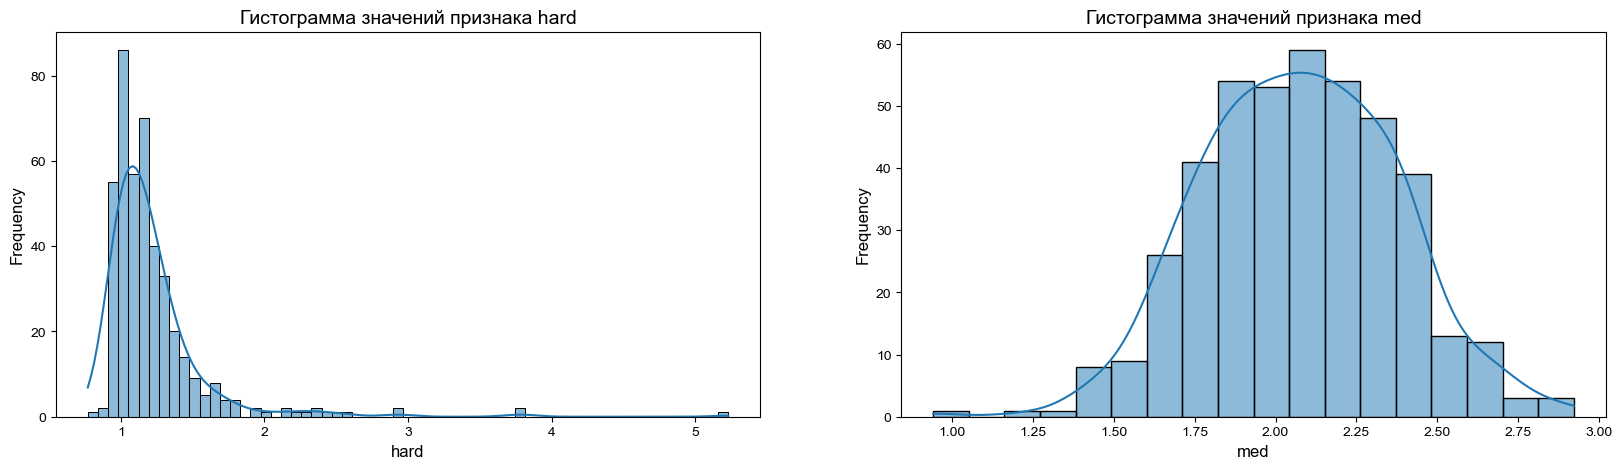

In [398]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font to Arial globally
plt.rcParams['font.family'] = 'Arial'
#df_nophen_x = df_nophen_x.drop(['NDVIre3'], axis=1)
# Sample data (for demonstration purposes, replace this with your actual DataFrame)
# df_nophen_x = pd.read_csv('your_data.csv')

# Create histograms for each feature in the DataFrame
def plot_histograms(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4  # Determine the number of rows needed

    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Гистограмма значений признака {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Remove any unused subplots

    plt.tight_layout()
    plt.show()

# Example DataFrame
# df_nophen_x = pd.DataFrame({
#     'Feature1': np.random.randn(100),
#     'Feature2': np.random.randn(100),
#     'Feature3': np.random.randn(100),
#     'Feature4': np.random.randn(100),
#     'Feature5': np.random.randn(100)
# })

# Replace the example DataFrame with your actual DataFrame
plot_histograms(target)

In [ ]:
#df.hist(figsize=(40, 20), layout=(-1, 5))

## No targets

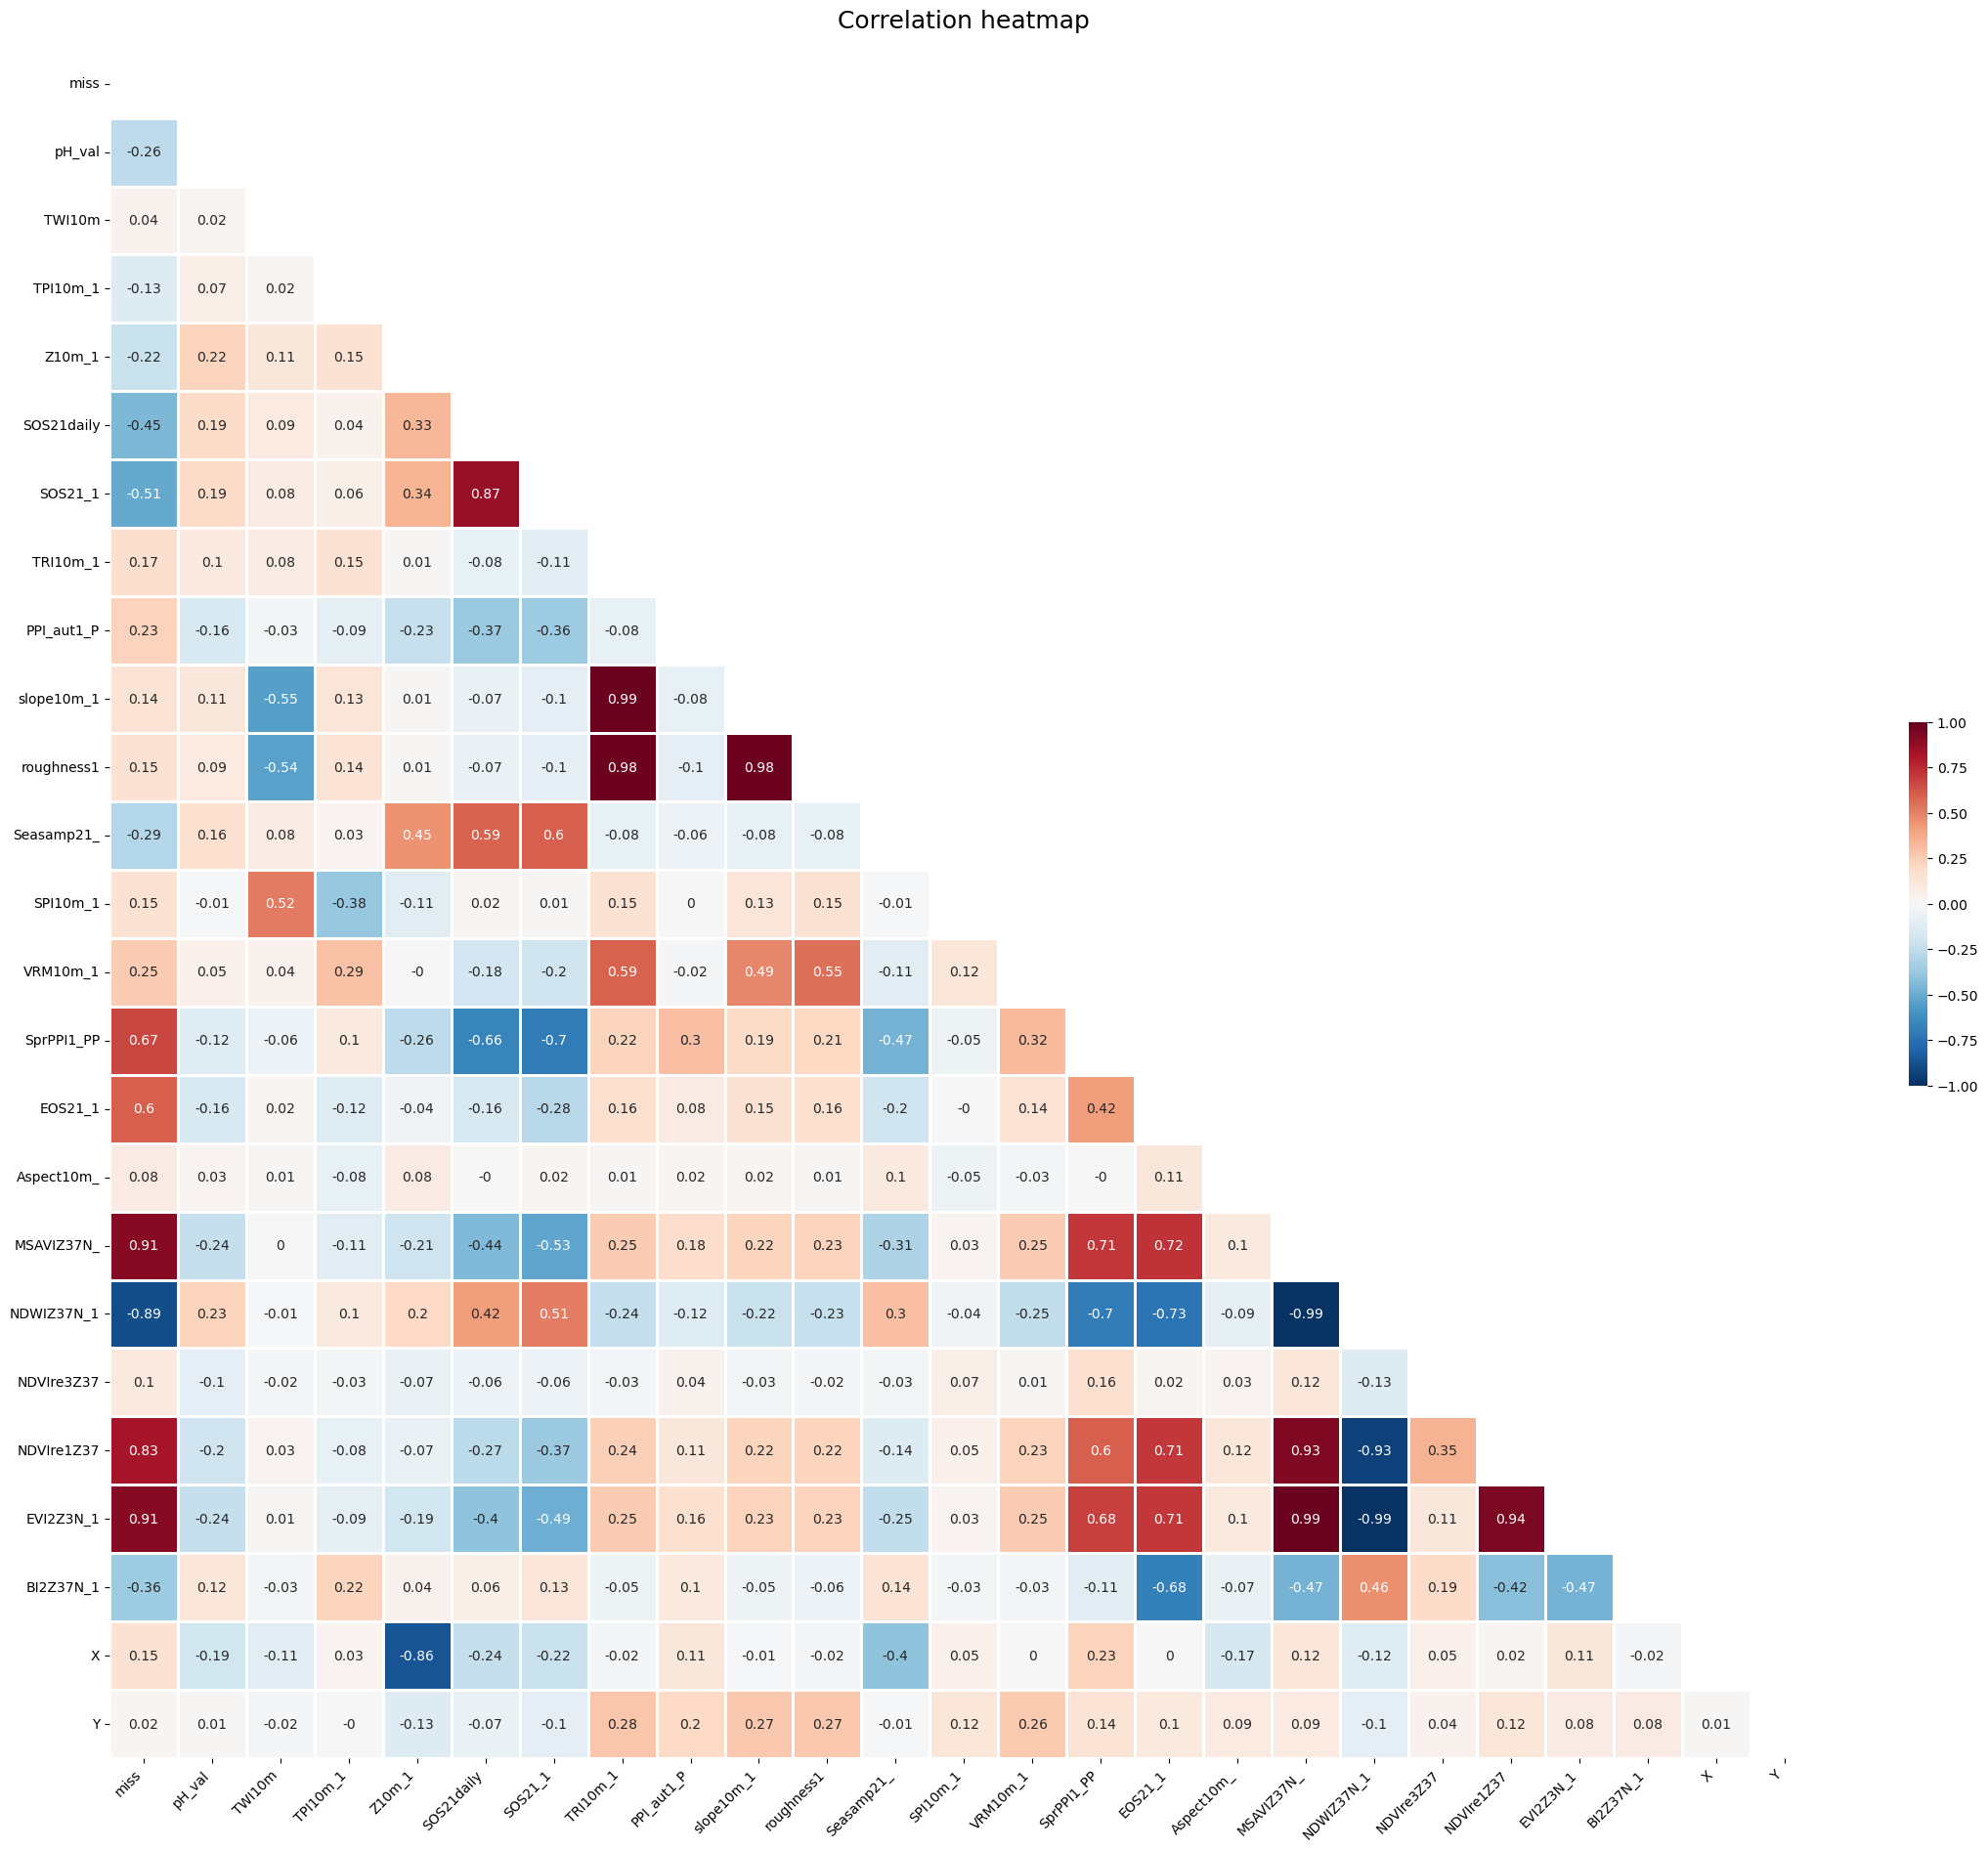

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_nophen_x is your DataFrame
correlation_matrix = df_nophen_x.corr(method="pearson", numeric_only=True).round(2)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(24, 24))

heatmap = sns.heatmap(
    correlation_matrix,
    mask=mask,  # Apply the mask
    annot=True,
    square=True,
    cmap="RdBu_r",
    vmax=1,
    vmin=-1,
    cbar_kws={"fraction": 0.01},  # shrink colour bar
    linewidth=2,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)

heatmap.set_title("Correlation heatmap", fontdict={"fontsize": 18}, pad=16)
plt.show()

## targets

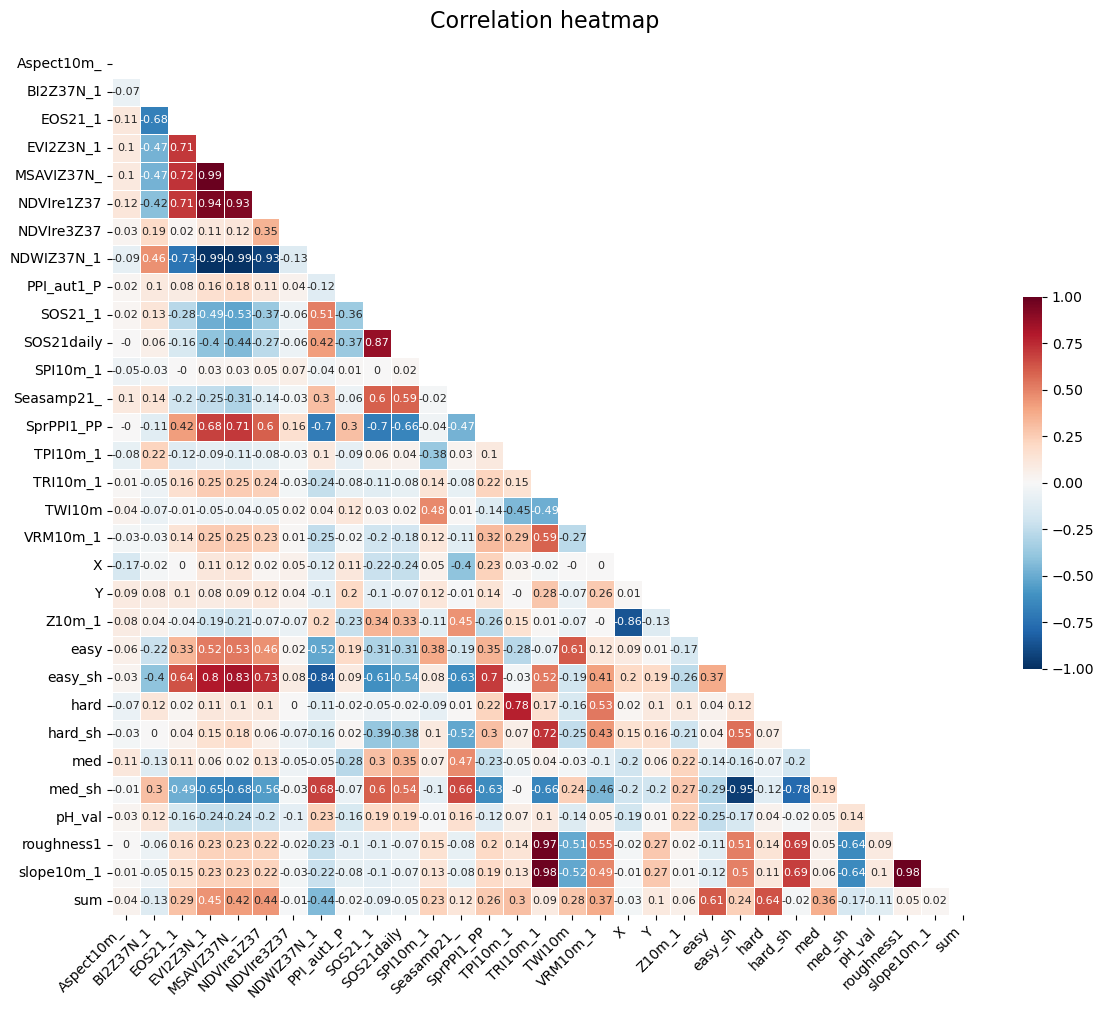

In [266]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_nophen is your DataFrame
correlation_matrix = df_nophen.corr(method="pearson", numeric_only=True).round(2)

# Sort the columns in alphabetical order
sorted_columns = sorted(correlation_matrix.columns)

# Reindex the matrix based on sorted columns
correlation_matrix_sorted = correlation_matrix.reindex(columns=sorted_columns, index=sorted_columns)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_sorted, dtype=bool))

plt.figure(figsize=(12, 12))  # Reduced figure size

heatmap = sns.heatmap(
    correlation_matrix_sorted,
    mask=mask,  # Apply the mask
    annot=True,
    annot_kws={"size": 8},  # Smaller font size for annotations
    square=True,
    cmap="RdBu_r",
    vmax=1,
    vmin=-1,
    cbar_kws={"fraction": 0.02, "shrink": 0.75},  # Adjust color bar position and size
    linewidth=0.5,  # Reduced linewidth
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=10  # Smaller font size for tick labels
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(), fontsize=10  # Smaller font size for tick labels
)
heatmap.set_title("Correlation heatmap", fontdict={"fontsize": 16}, pad=16)
plt.show()

In [377]:
df_nophen_x.columns

Index(['pH_val', 'TWI', 'TPI', 'RgI', 'SOS', 'SOSEOS', 'TRI', 'BI',
       'экспозиция', 'шероховатость ', 'Seasamp21_', 'SPI', 'VRM', 'PPI',
       'EOS', 'Уклон', 'MSAVI_', 'NDWI', 'NDVIre3', 'NDVIre1', 'EVI2', 'BI2',
       'X', 'Y'],
      dtype='object')

## phik for targets

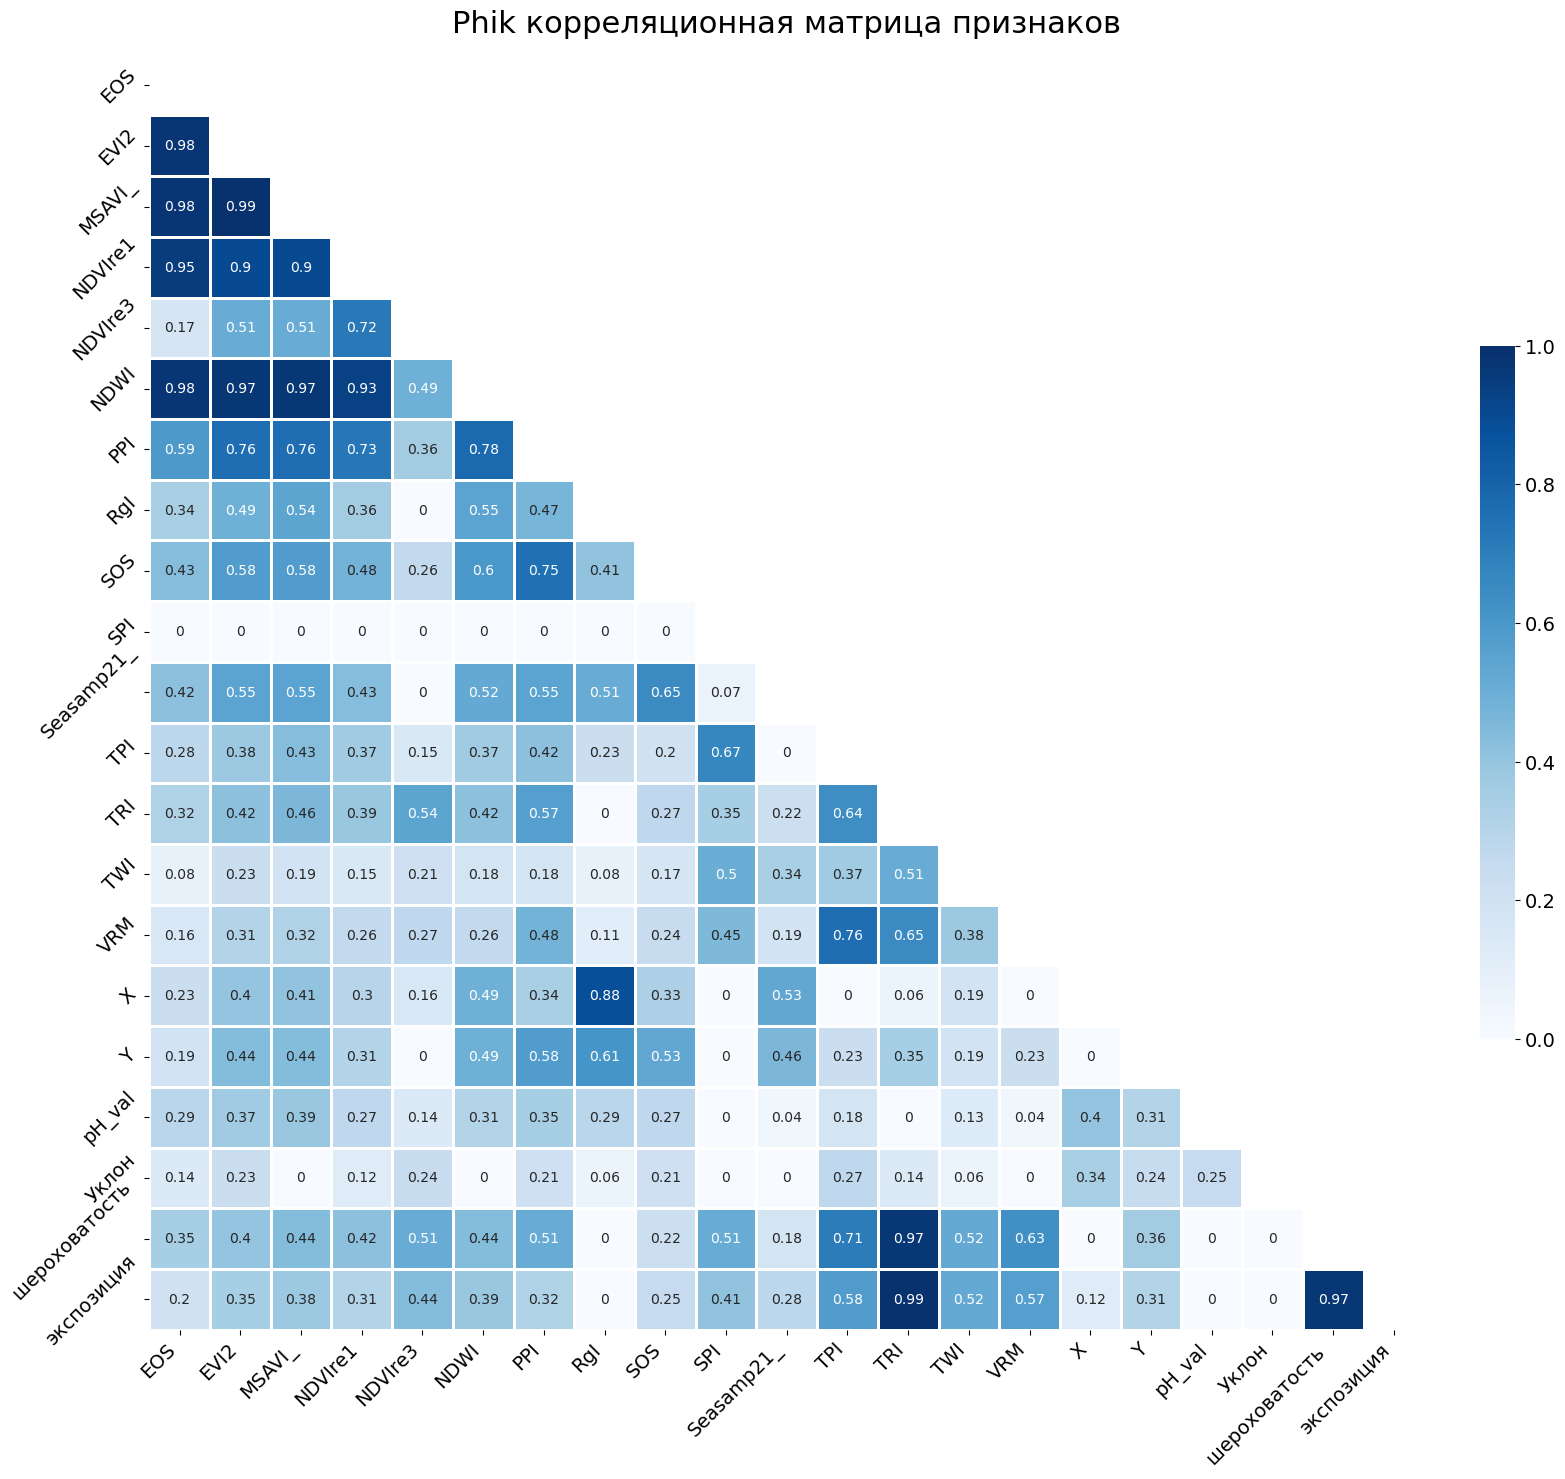

In [388]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix
import numpy as np

# Calculate the Phi-k correlation matrix
# df_nophen_x = df_nophen_x.drop(['SOSEOS'], axis=1)
phik_corr_matrix = df_nophen_x.phik_matrix(interval_cols=df_nophen.columns)

# Round the values to 2 decimal places
phik_corr_matrix_rounded = phik_corr_matrix.round(2)

# Sort the columns in alphabetical order
sorted_columns = sorted(phik_corr_matrix_rounded.columns)

# Reindex the matrix based on sorted columns
phik_corr_matrix_sorted = phik_corr_matrix_rounded.reindex(columns=sorted_columns, index=sorted_columns)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(phik_corr_matrix_sorted, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(18, 18))
heatmap = sns.heatmap(
    phik_corr_matrix_sorted,
    mask=mask,
    annot=True,
    square=True,
    cmap='Blues',
    vmax=1,
    vmin=0,
    cbar_kws={'shrink': 0.5, 'aspect': 20, 'fraction': 0.046, 'pad': 0.04},  # increase color bar size
    linewidth=2,
    annot_kws={"size": 10},  # increase annotation font size
)

# Increase colorbar label fontsize
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)

# Adjust the x-tick and y-tick labels fontsize
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

# Set the title with increased fontsize
heatmap.set_title('Phik корреляционная матрица признаков', fontdict={'fontsize': 22}, pad=16)

# Display the plot
plt.show()

## average values

In [79]:
average_values = df.groupby('2_Points_manage_biotopes_spatial_join_biotopes')[['hard_sh', 'med_sh', 'easy_sh']].mean()

KeyError: '2_Points_manage_biotopes_spatial_join_biotopes'

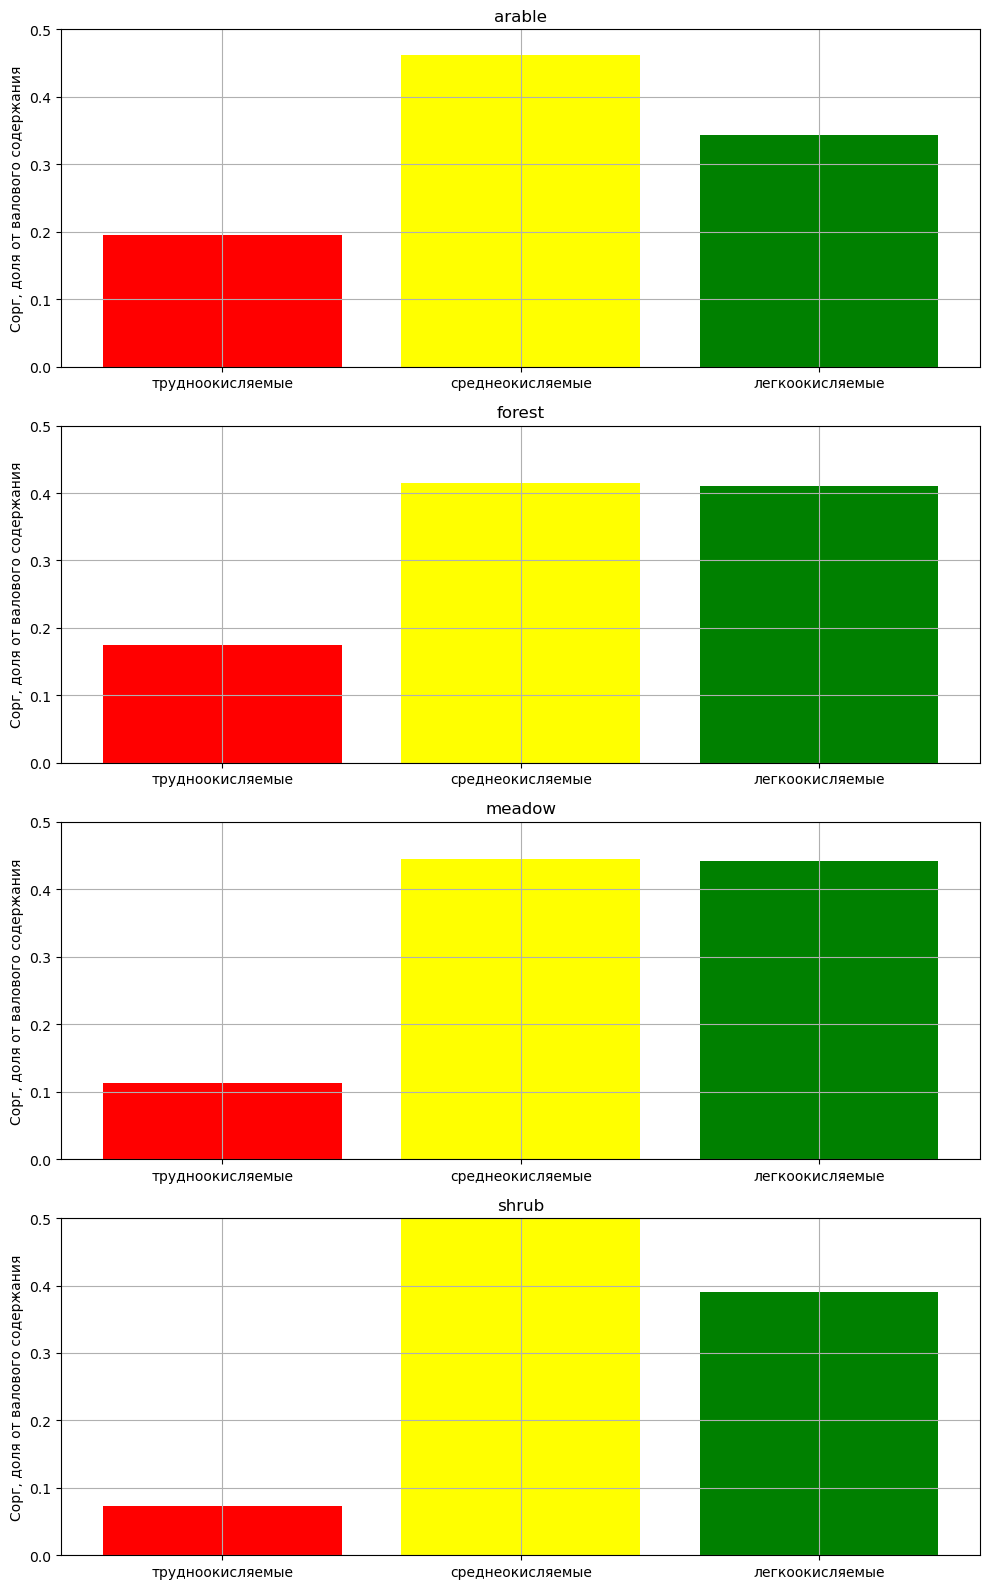

In [35]:
# Plotting
fig, axs = plt.subplots(4, 1, figsize=(10, 16))

for i, column in enumerate(average_values.T.columns):
    ax = axs[i]
    ax.bar(average_values.T.index, average_values.T[column], color=['red', 'yellow', 'green']) # Assigning different colors to each bar
    ax.set_ylabel('Сорг, доля от валового содержания')
    ax.set_xticks(['hard_sh', 'med_sh', 'easy_sh'],labels=['трудноокисляемые','среднеокисляемые','легкоокисляемые'])
    ax.set_xlabel('')
    ax.set_title(column)
    ax.grid(True)
    ax.set_ylim([0,0.5])

plt.tight_layout()
plt.show()


## Data preparation

In [54]:
!pip install -q catboost
!pip install -q lightgbm==3.0

In [55]:
!pip install xgboost
!pip install scikit-learn

In [91]:
import catboost
import lightgbm
import xgboost
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    KFold,
)
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    VotingRegressor,
)
import shap

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_metrics(y_true, y_predicted):
    print(f"Mean squared error: {mean_squared_error(y_true, y_predicted):.3f}")
    print(
        "Root mean squared error: ",
        f"{mean_squared_error(y_true, y_predicted, squared=False):.3f}",
    )
    print(f"Mean absolute error: {mean_absolute_error(y_true, y_predicted):.3f}")
    print(f"R2 score: {r2_score(y_true, y_predicted):.3f}")
    print('\n')
def print_regression_equation(model, feature_names):
    intercept = model.intercept_
    coefficients = model.coef_
    equation = f"y = {intercept:.4f}"
    for coef, feature in zip(coefficients, feature_names):
        equation += f" + ({coef:.4f} * {feature})"
    print(equation)

In [332]:


#df = df.dropna()
#x = df.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1)
#x = x.dropna()    

df = df_nophen.dropna()
x = df.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1)
x = x.dropna()    

In [311]:
x.columns

Index(['pH_val', 'TWI', 'TPI', 'RgI', 'SOS', 'SOSEOS', 'TRI', 'BI', 'уклон',
       'шероховатость ', 'Seasamp21_', 'SPI', 'VRM', 'PPI', 'EOS', 'Уклон',
       'MSAVIZ37N_', 'NDWI', 'NDVIre3Z37', 'NDVIre1Z37', 'EVI2Z3N_1',
       'BI2Z37N_1', 'X', 'Y'],
      dtype='object')

# LinReg

Results for hard fraction:
----------------------------


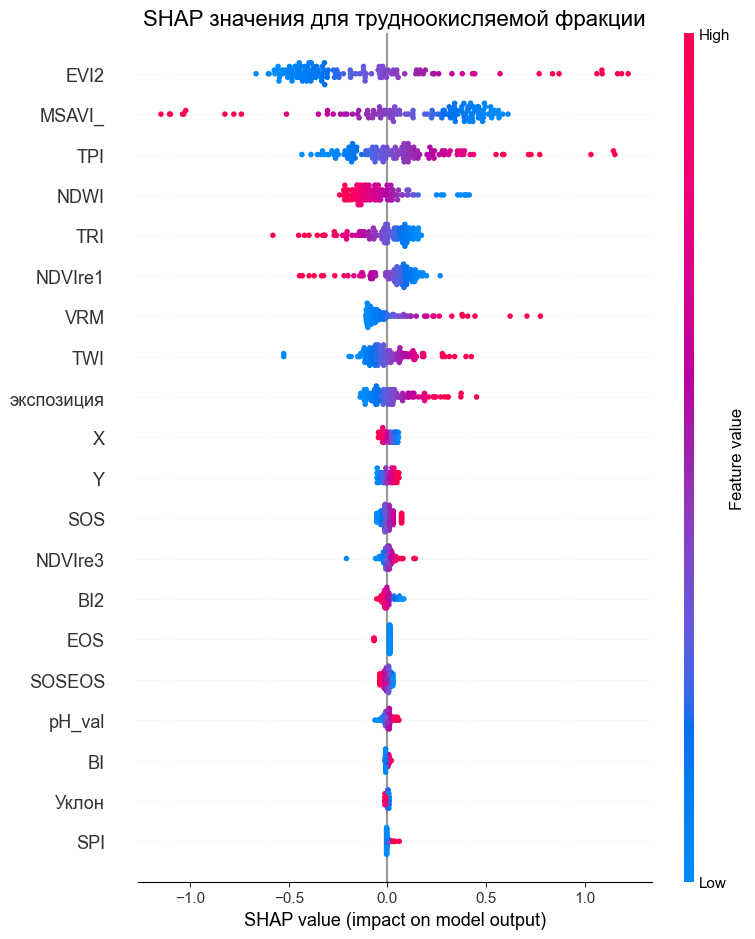

Results for med fraction:
----------------------------


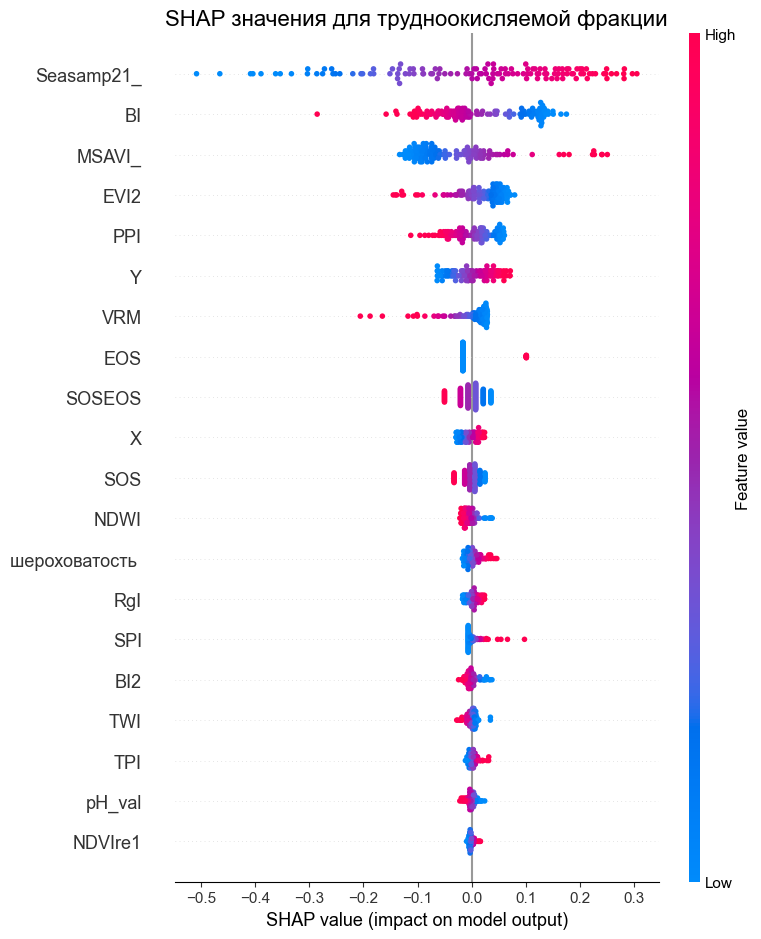

Results for easy fraction:
----------------------------


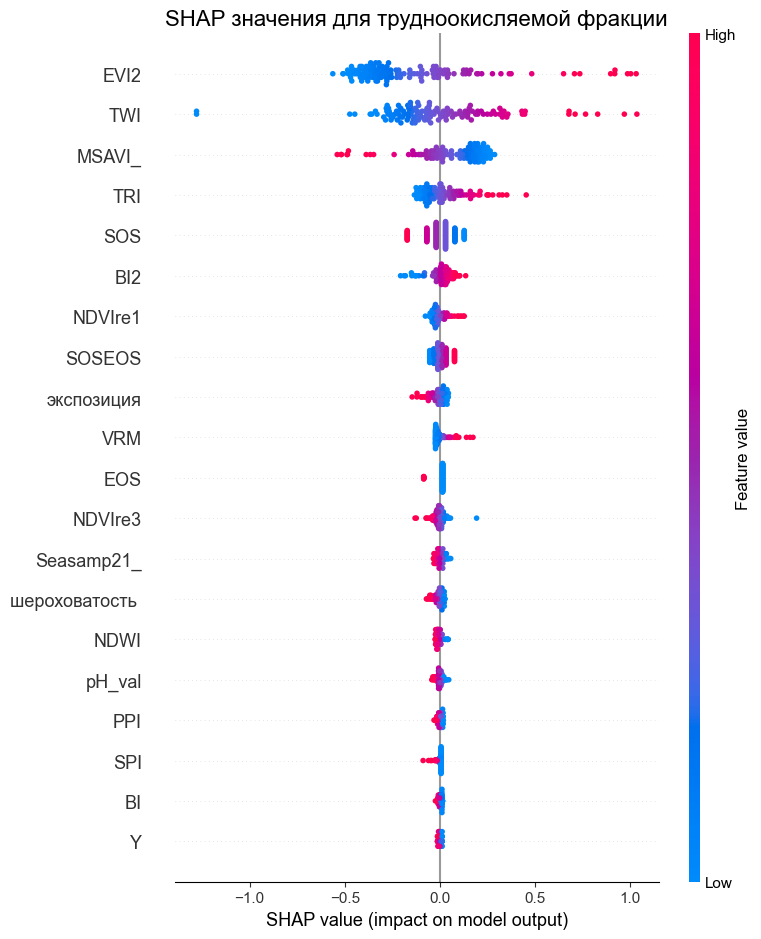

Results for sum fraction:
----------------------------


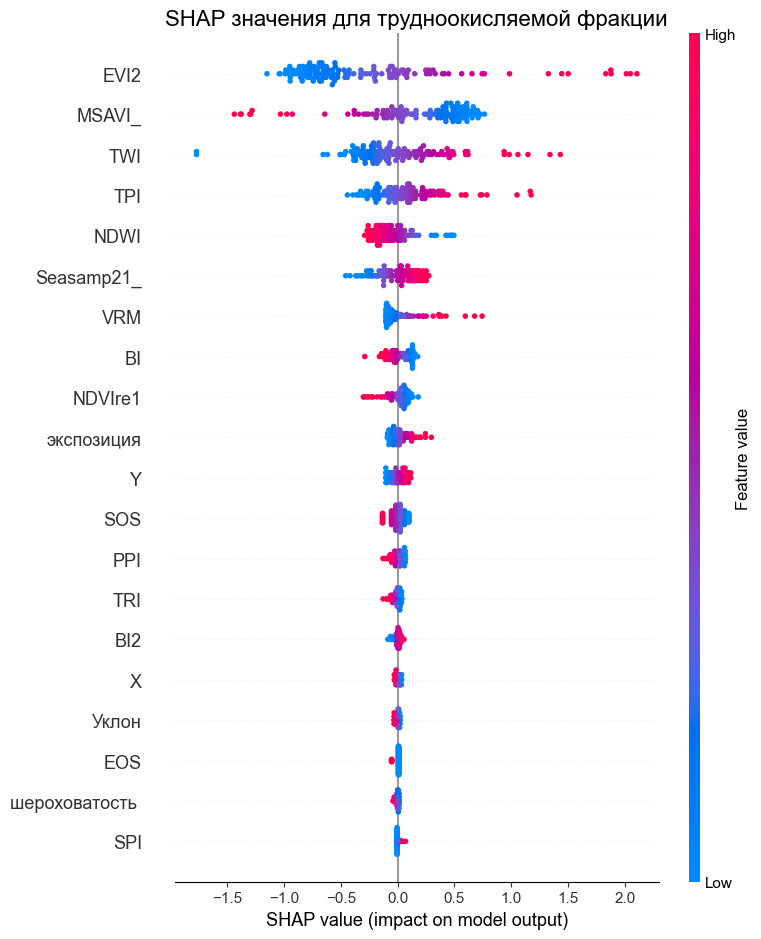

In [399]:
for fraction in ['hard', 'med', 'easy', 'sum']:
    y = df[fraction]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    regressor = LinearRegression()
    regressor.fit(x_train_scaled, y_train)

    y_pred = regressor.predict(x_test_scaled)

    print(f'Results for {fraction} fraction:')
    print_metrics(y_test, y_pred)
    print('----------------------------')

    # SHAP values calculation
    explainer = shap.LinearExplainer(regressor, x_train_scaled)
    shap_values = explainer.shap_values(x_test_scaled)

    # Plot the SHAP values
    #shap.summary_plot(shap_values, x_test_scaled, feature_names=x.columns, plot_type="bar")
    plt.title(f'SHAP значения для трудноокисляемой фракции')
    #plt.show()

    shap.summary_plot(shap_values, x_test_scaled, feature_names=x.columns)
    #plt.title(f'SHAP Summary Plot for {fraction} fraction')
    plt.show()

In [34]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Iterate through each column
for column in df.columns:
    # Check if 'forest' is present in any cell of the column
    if 'forest' in df[column].values:
        print(f"The value 'forest' is present in column: {column}")


The value 'forest' is present in column: Biotopes_1


# RF

Metrics for hard fraction:
Mean squared error: 0.043
Root mean squared error:  0.208
Mean absolute error: 0.101
R2 score: 0.826




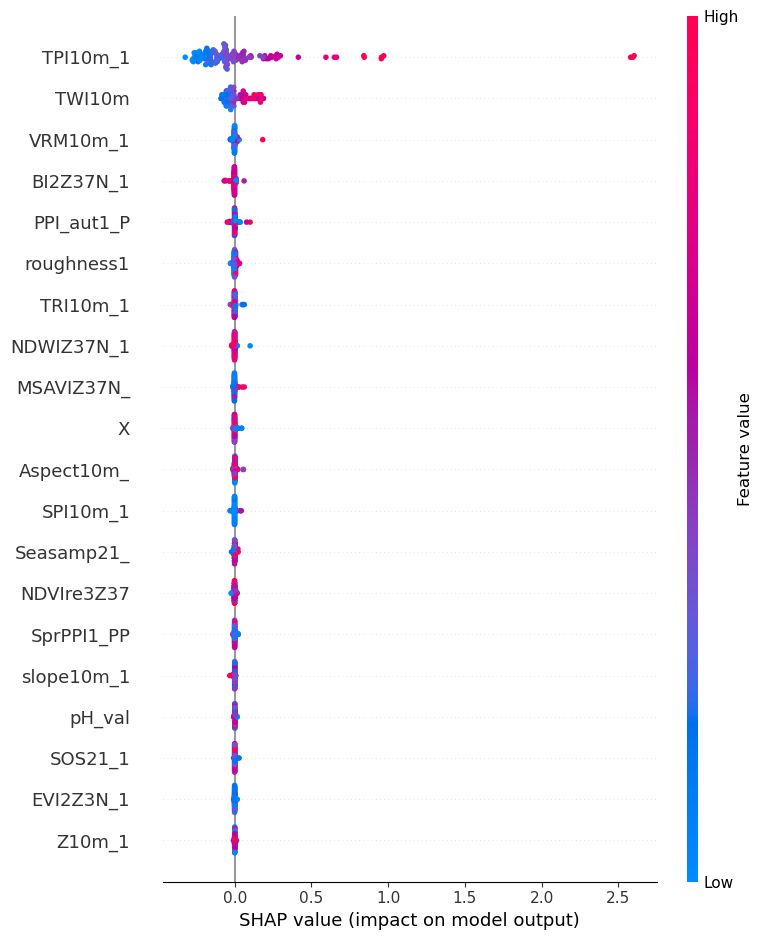

Metrics for med fraction:
Mean squared error: 0.081
Root mean squared error:  0.285
Mean absolute error: 0.223
R2 score: 0.227




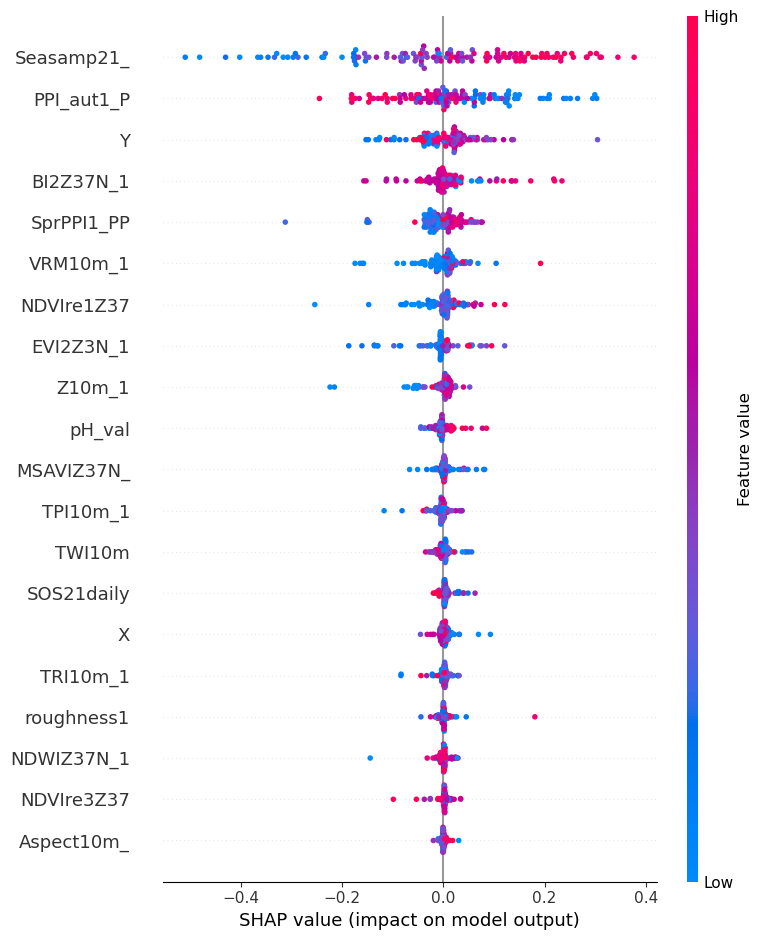

Metrics for easy fraction:
Mean squared error: 0.089
Root mean squared error:  0.298
Mean absolute error: 0.238
R2 score: 0.359




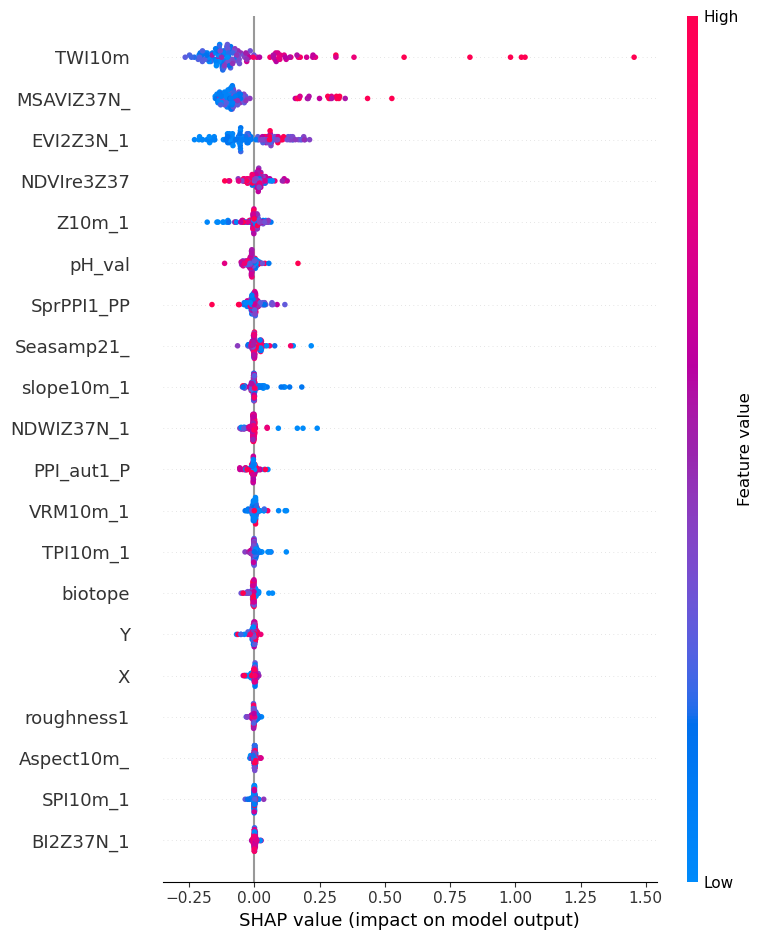

Metrics for sum fraction:
Mean squared error: 0.223
Root mean squared error:  0.472
Mean absolute error: 0.368
R2 score: 0.491




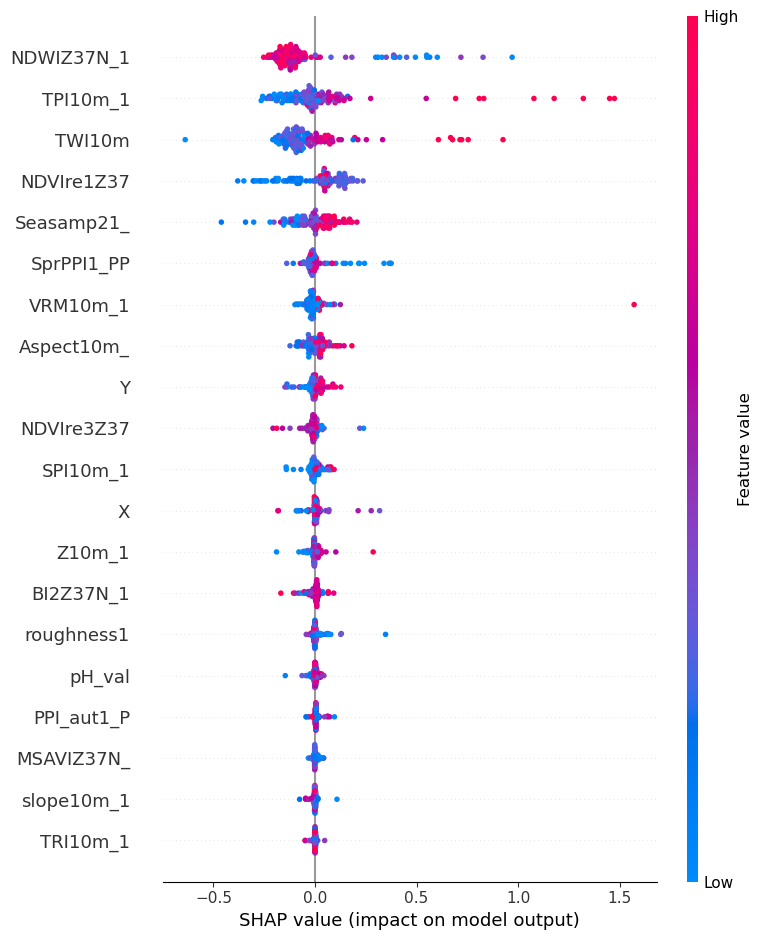

In [130]:
for fraction in ['hard', 'med', 'easy', 'sum']:
    y = df[fraction]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    regressor = DecisionTreeRegressor()
    regressor.fit(x_train_scaled, y_train)

    y_pred = regressor.predict(x_test_scaled)

    print(f"Metrics for {fraction} fraction:")
    print_metrics(y_test, y_pred)

    # SHAP values
    explainer = shap.TreeExplainer(regressor)
    shap_values = explainer.shap_values(x_test_scaled)
    
    # Plot SHAP summary
    shap.summary_plot(shap_values, x_test_scaled, feature_names=x.columns)

    # Optional: If you want to see a single prediction's explanation
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values[0,:], x_test_scaled[0,:], feature_names=x.columns)

plt.show()

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regressor = DecisionTreeRegressor()
regressor.fit(x_train_scaled, y_train)

# Print table
y_pred = regressor.predict(x_test_scaled)
data = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
data

Actual  Predicted
366  5.490478   5.392423
27   7.249289   9.077332
19   6.044586   6.748408
365  3.770055   5.390890
270  6.295071   6.141663
..        ...        ...
225  4.857209   5.684119
210  6.840699   6.844891
195  5.034915   4.110692
341  5.173323   4.236910
59   2.193334   3.780994

[106 rows x 2 columns]

## CatBoost

In [ ]:
!pip install catboost

(425, 60) (425,)
Metrics for hard fraction:


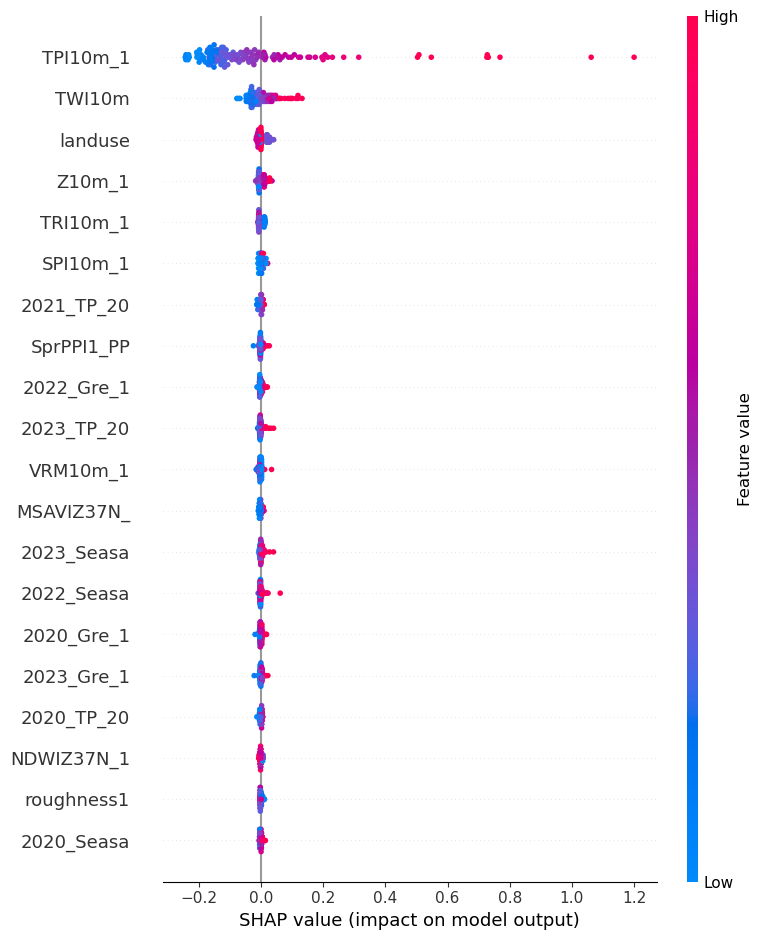

(425, 60) (425,)
Metrics for med fraction:


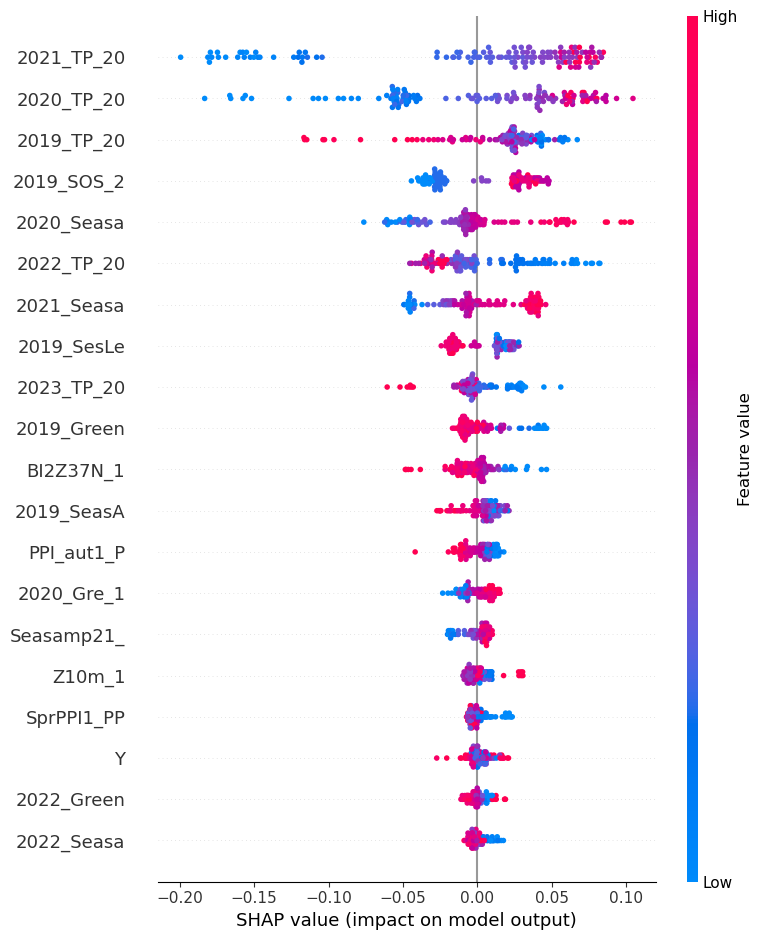

(425, 60) (425,)
Metrics for easy fraction:


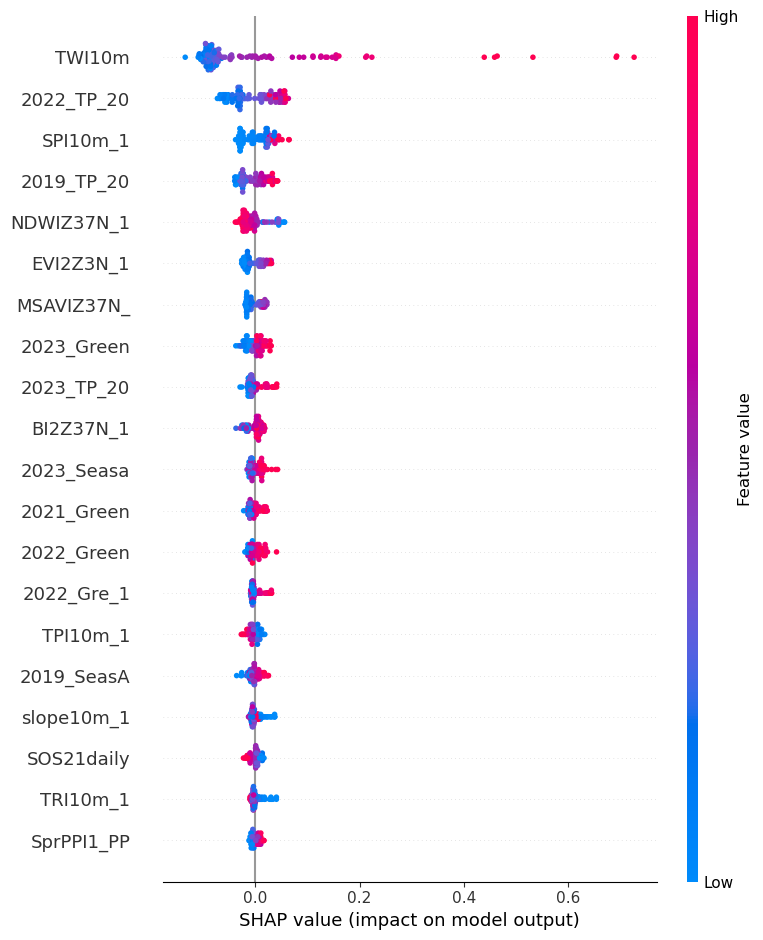

(425, 60) (425,)
Metrics for sum fraction:


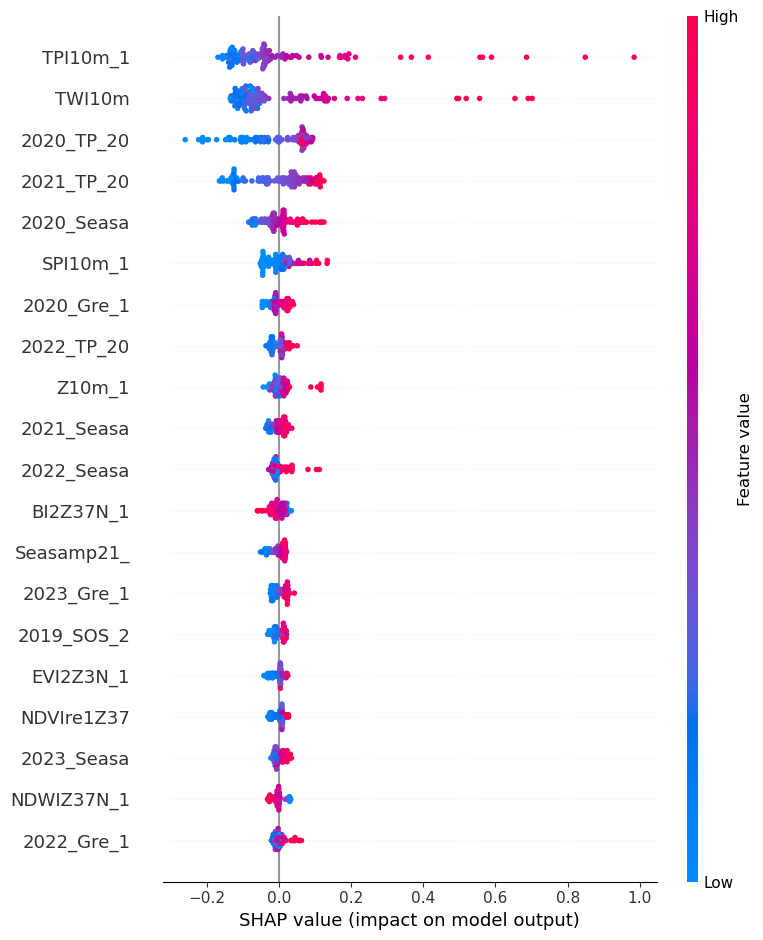

In [155]:
import matplotlib.pyplot as plt
import os 
import pandas as pd

df = pd.read_excel('C:\\Users\\pihchikk\\Desktop\\Science\\Tokarevka\\POINTS_ML_16.06.24_2.xlsx')
df=df.drop('rand_point', axis=1)
df = df.dropna()
x = df.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1)
x = x.dropna()    

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the necessary columns

q1 = df['TPI10m_1'].quantile(0.25)
q3 = df['TPI10m_1'].quantile(0.75)

# Function to assign biotope based on TPI value
def assign_biotope(tpi):
    if tpi <= q1:
        return 'grass'
    elif tpi <= df['TPI10m_1'].median():
        return 'arable'
    elif tpi <= q3:
        return 'shrub'
    else:
        return 'forest'

# Function to assign biotope based on TPI value
def assign_biotope(tpi):
    if tpi <= q1:
        return 'grass'
    elif tpi <= df['TPI10m_1'].median():
        return 'arable'
    elif tpi <= q3:
        return 'shrub'
    else:
        return 'forest'


# Apply the function to create the 'biotope' column
df['landuse'] = df['TPI10m_1'].apply(assign_biotope)
x['landuse'] = df['landuse'].astype('category').cat.codes  # Convert 'biotope' to numerical codes
x['Biotopes_s'] = df['Biotopes_s'].astype('category').cat.codes  # Convert 'biotope' to numerical codes

years_to_drop = ['2019', '2020', '2021', '2022', '2023']
df_nophen = df.drop(columns=[col for col in df.columns if any(year in col for year in years_to_drop)])


for fraction in ['hard', 'med', 'easy', 'sum']:
    y = df[fraction]
    print(x.shape,y.shape)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize CatBoostRegressor
    model = CatBoostRegressor(verbose=0)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    print(f"Metrics for {fraction} fraction:")
    print_metrics(y_test, y_pred)

    # SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_scaled)

    # Plot SHAP summary
    shap.summary_plot(shap_values, X_test_scaled, feature_names=x.columns)

    # Optional: If you want to see a single prediction's explanation
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_scaled[0,:], feature_names=x.columns)

plt.show()

Fitting Cреднее по биотопам
Fitting LR
Fitting PLSR
Fitting RF
Fitting CB
Fitting Тюнинг CB
0:	learn: 0.4083988	total: 1.11ms	remaining: 1.45s
500:	learn: 0.0483790	total: 404ms	remaining: 644ms
1000:	learn: 0.0212864	total: 794ms	remaining: 237ms
1299:	learn: 0.0155969	total: 1.02s	remaining: 0us
Calculating bootstrap score for Cреднее по биотопам
Calculating bootstrap score for LR
Calculating bootstrap score for PLSR
Calculating bootstrap score for RF
Calculating bootstrap score for CB
Calculating bootstrap score for Тюнинг CB


C:\Users\pihchikk\AppData\Local\Temp\ipykernel_12040\3453621070.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='mse', data=results_mse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_12040\3453621070.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")


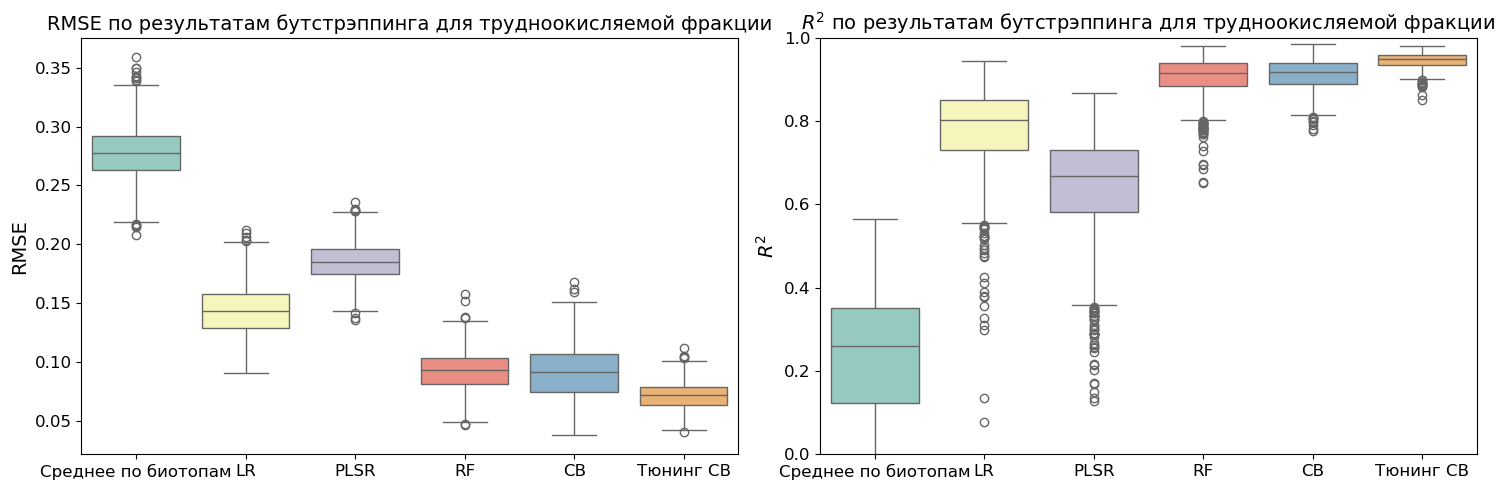

Fitting Cреднее по биотопам
Fitting LR
Fitting PLSR
Fitting RF
Fitting CB
Fitting Тюнинг CB
0:	learn: 0.2941424	total: 1.93ms	remaining: 2.51s
500:	learn: 0.1377404	total: 505ms	remaining: 806ms
1000:	learn: 0.0875326	total: 904ms	remaining: 270ms
1299:	learn: 0.0660280	total: 1.14s	remaining: 0us
Calculating bootstrap score for Cреднее по биотопам
Calculating bootstrap score for LR
Calculating bootstrap score for PLSR
Calculating bootstrap score for RF
Calculating bootstrap score for CB
Calculating bootstrap score for Тюнинг CB


C:\Users\pihchikk\AppData\Local\Temp\ipykernel_12040\3453621070.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='mse', data=results_mse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_12040\3453621070.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")


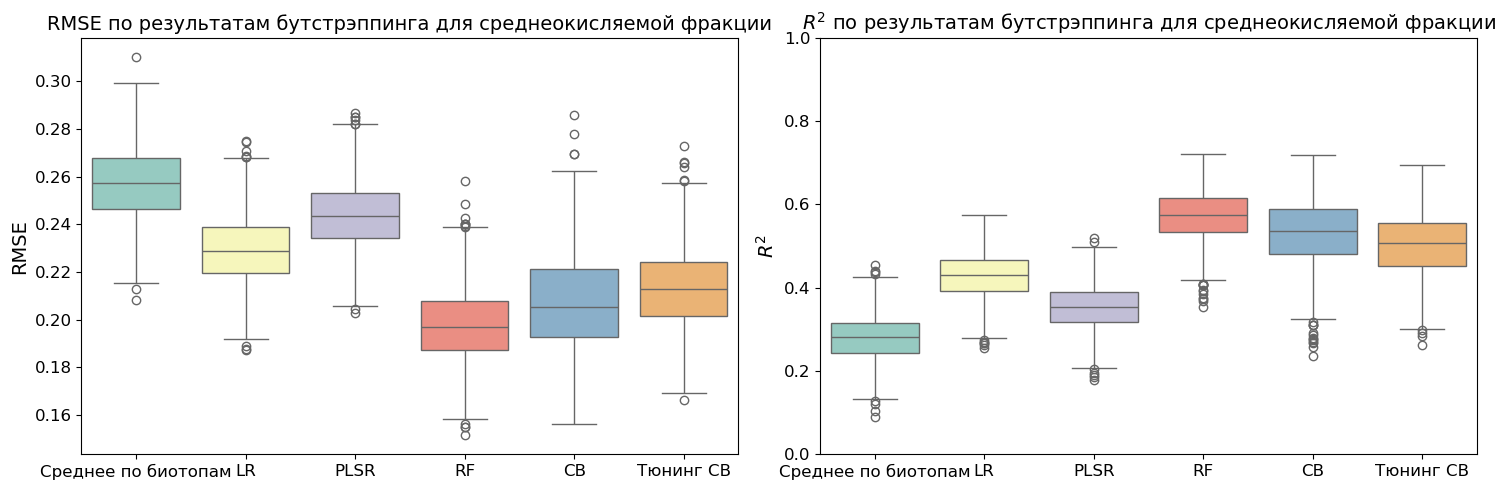

Fitting Cреднее по биотопам
Fitting LR
Fitting PLSR
Fitting RF
Fitting CB
Fitting Тюнинг CB
0:	learn: 0.3669435	total: 1.15ms	remaining: 1.49s
500:	learn: 0.1210822	total: 400ms	remaining: 637ms
1000:	learn: 0.0798028	total: 787ms	remaining: 235ms
1299:	learn: 0.0634333	total: 1.03s	remaining: 0us
Calculating bootstrap score for Cреднее по биотопам
Calculating bootstrap score for LR
Calculating bootstrap score for PLSR
Calculating bootstrap score for RF
Calculating bootstrap score for CB
Calculating bootstrap score for Тюнинг CB


C:\Users\pihchikk\AppData\Local\Temp\ipykernel_12040\3453621070.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='mse', data=results_mse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_12040\3453621070.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")


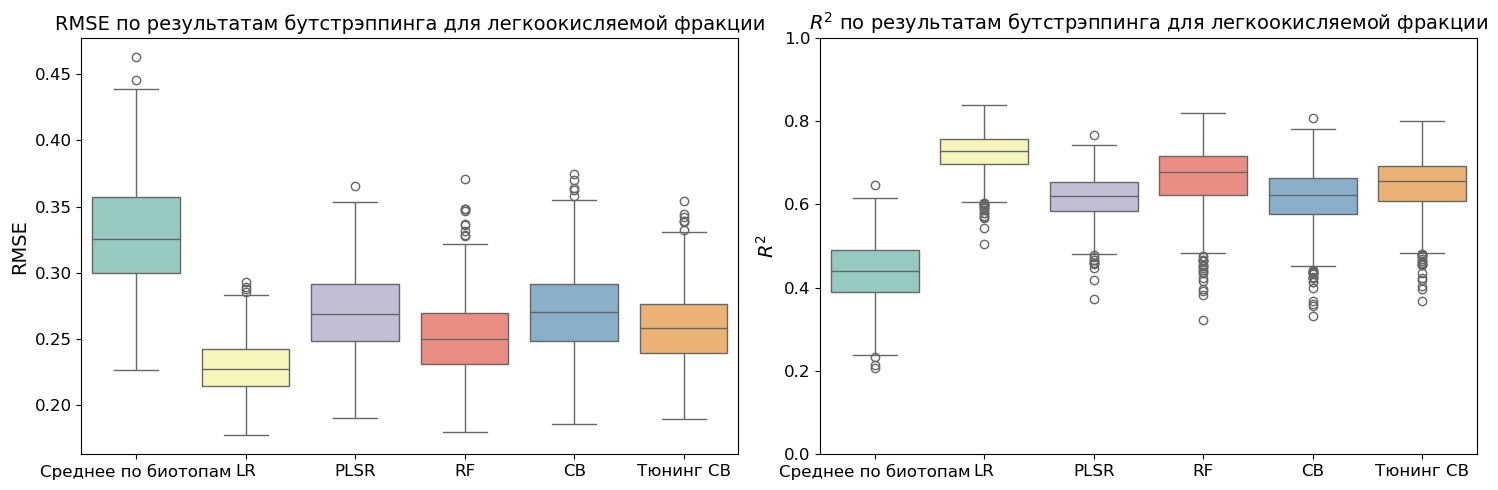

Fitting Cреднее по биотопам
Fitting LR
Fitting PLSR
Fitting RF
Fitting CB
Fitting Тюнинг CB
0:	learn: 0.5974132	total: 1.31ms	remaining: 1.7s
500:	learn: 0.1851196	total: 401ms	remaining: 639ms
1000:	learn: 0.1168393	total: 793ms	remaining: 237ms
1299:	learn: 0.0889464	total: 1.03s	remaining: 0us
Calculating bootstrap score for Cреднее по биотопам
Calculating bootstrap score for LR
Calculating bootstrap score for PLSR
Calculating bootstrap score for RF
Calculating bootstrap score for CB
Calculating bootstrap score for Тюнинг CB


C:\Users\pihchikk\AppData\Local\Temp\ipykernel_12040\3453621070.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='mse', data=results_mse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_12040\3453621070.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")


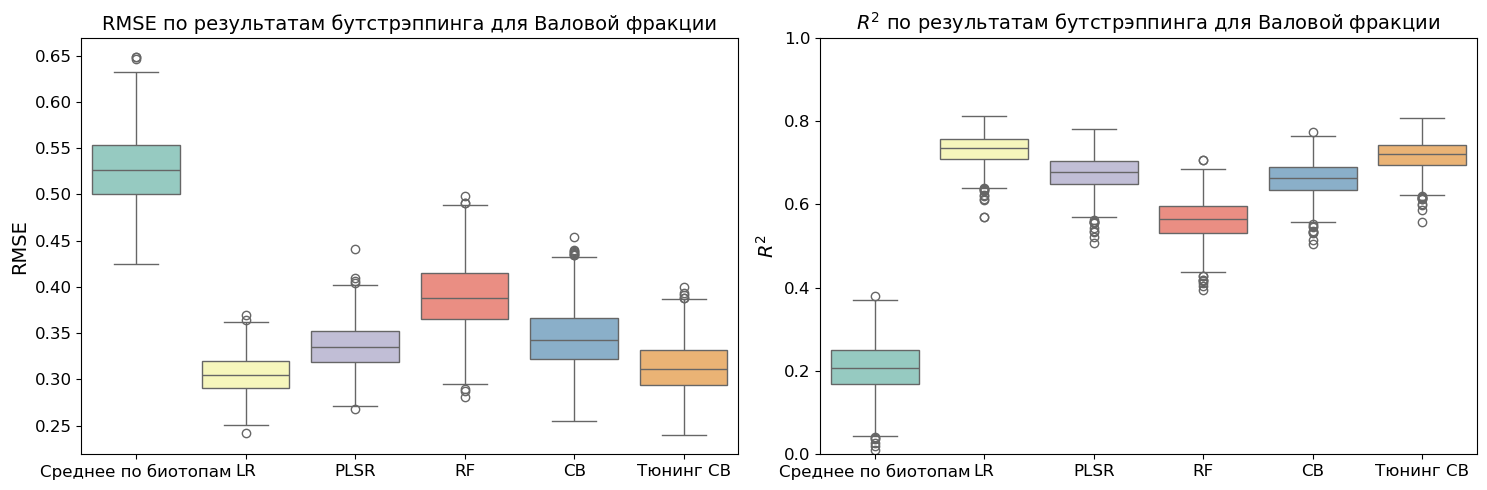

In [6]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12  # Set the x-axis tick size
plt.rcParams['ytick.labelsize'] = 12  # Set the y-axis tick size

# Load and preprocess the data
df = pd.read_excel('C:\\Users\\pihchikk\\Desktop\\Science\\Tokarevka\\POINTS_ML_16.06.24_2.xlsx')
df = df.drop('rand_point', axis=1).dropna()

years_to_drop = ['2019', '2020', '2021', '2022', '2023']
df = df.drop(columns=[col for col in df.columns if any(year in col for year in years_to_drop)])
df = df.drop(columns=['SOS21daily','SOS21_1','EOS21_1','SprPPI1_PP','PPI_aut1_P'])

x = df.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1).dropna()

# Calculate TPI quantiles for biotope assignment
q1 = df['TPI10m_1'].quantile(0.25)
q3 = df['TPI10m_1'].quantile(0.75)

# Function to assign biotope based on TPI value
def assign_biotope(tpi):
    if tpi <= q1:
        return 'grass'
    elif tpi <= df['TPI10m_1'].median():
        return 'arable'
    elif tpi <= q3:
        return 'shrub'
    else:
        return 'forest'

# Apply the function to create the 'biotope' column
df['landuse'] = df['TPI10m_1'].apply(assign_biotope)
x['landuse'] = df['landuse'].astype('category').cat.codes  # Convert 'landuse' to numerical codes
x['Biotopes_s'] = df['Biotopes_s'].astype('category').cat.codes  # Convert 'Biotopes_s' to numerical codes

def print_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

def bootstrap_metric(y_true, y_pred, n_iterations=1000, sample_size=None, random_seed=42):
    if sample_size is None:
        sample_size = len(y_true)
    np.random.seed(random_seed)
    rmse_scores = []
    r2_scores = []
    rpiq_scores = []
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)
    q1 = np.percentile(y_true_np, 25)
    q3 = np.percentile(y_true_np, 75)
    iqr = q3 - q1

    for _ in range(n_iterations):
        indices = np.random.choice(len(y_true_np), size=sample_size, replace=True)
        y_true_sample = y_true_np[indices]
        y_pred_sample = y_pred_np[indices]
        mse = mean_squared_error(y_true_sample, y_pred_sample)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true_sample, y_pred_sample)
        rpiq = iqr / rmse
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        rpiq_scores.append(rpiq)
    return rmse_scores, r2_scores, rpiq_scores

def train_and_test_regressor(models, x_train, y_train, x_test, y_test):
    for name, model in models.items():
        print(f"Fitting {name}")
        model.fit(x_train, y_train)
    predictions = {}
    for name, model in models.items():
        y_pred = model.predict(x_test)
        predictions[name] = y_pred

    boot_scores_mse = {}
    boot_scores_r2 = {}
    boot_scores_rpiq = {}

    for name, y_pred in predictions.items():
        print(f"Calculating bootstrap score for {name}")
        mse_scores, r2_scores, rpiq_scores = bootstrap_metric(y_test, y_pred)
        boot_scores_mse[name] = mse_scores
        boot_scores_r2[name] = r2_scores
        boot_scores_rpiq[name] = rpiq_scores

    results_mse = pd.DataFrame(boot_scores_mse)
    results_r2 = pd.DataFrame(boot_scores_r2)
    results_rpiq = pd.DataFrame(boot_scores_rpiq)
    
    # Cast to long format
    results_mse = results_mse.melt(value_vars=results_mse.columns, value_name="mse", var_name="model")
    results_r2 = results_r2.melt(value_vars=results_r2.columns, value_name="r2", var_name="model")
    results_rpiq = results_rpiq.melt(value_vars=results_rpiq.columns, value_name="rpiq", var_name="model")
    return results_mse, results_r2, results_rpiq

# Models to be used in the loop
models = {
    "Cреднее по биотопам": PLSRegression(n_components=1),
    "LR": LinearRegression(),
    "PLSR": PLSRegression(n_components=2), 
    "RF": RandomForestRegressor(n_estimators=500, n_jobs=-1),
    "CB": CatBoostRegressor(verbose=0),
    "Тюнинг CB": CatBoostRegressor(
        iterations=1300,
        learning_rate=0.03,
        depth=3,
        l2_leaf_reg=4,
        random_seed=42,
        verbose=500  # Adjust the verbosity level to see training progress
    ),
}

rus = {'hard':'трудноокисляемой', 'med':'среднеокисляемой', 'easy':'легкоокисляемой', 'sum':'Валовой'}
# Loop through fractions and models
for fraction in ['hard', 'med', 'easy', 'sum']:
    y = df[fraction]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Train models and get predictions
    results_mse, results_r2, results_rpiq = train_and_test_regressor(models, X_train_scaled, y_train, X_test_scaled, y_test)

    # Boxplot for MSE values
    sns.boxplot(x='model', y='mse', data=results_mse, ax=axes[0], palette="Set3")
    axes[0].set_title(f"RMSE по результатам бутстрэппинга для {rus[fraction]} фракции")
    axes[0].set_ylabel("RMSE")
    axes[0].set_xlabel("")

    # Boxplot for R2 values
    sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")
    axes[1].set_title(f"$R^2$ по результатам бутстрэппинга для {rus[fraction]} фракции")
    axes[1].set_ylabel("$R^2$")
    axes[1].set_xlabel("")
    axes[1].set_ylim(0, 1)

    plt.tight_layout()
    #plt.suptitle(f'Bootstrap MSE, R2, and RPIQ for {fraction} Fraction', y=1.05, fontsize=16)
    plt.show()

In [293]:
y_true = [[0.5, 1],[-1, 1],[7, -6]]

y_pred = [[0, 2],[-1, 2],[8, -5]]

mean_squared_error(y_true, y_pred)

0.7083333333333334

# CROSSVAL

Evaluating Cреднее по биотопам
Evaluating LR
Evaluating PLSR
Evaluating RF
Evaluating CB


C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rpiq', data=results_rpiq, ax=axes[2], palette="

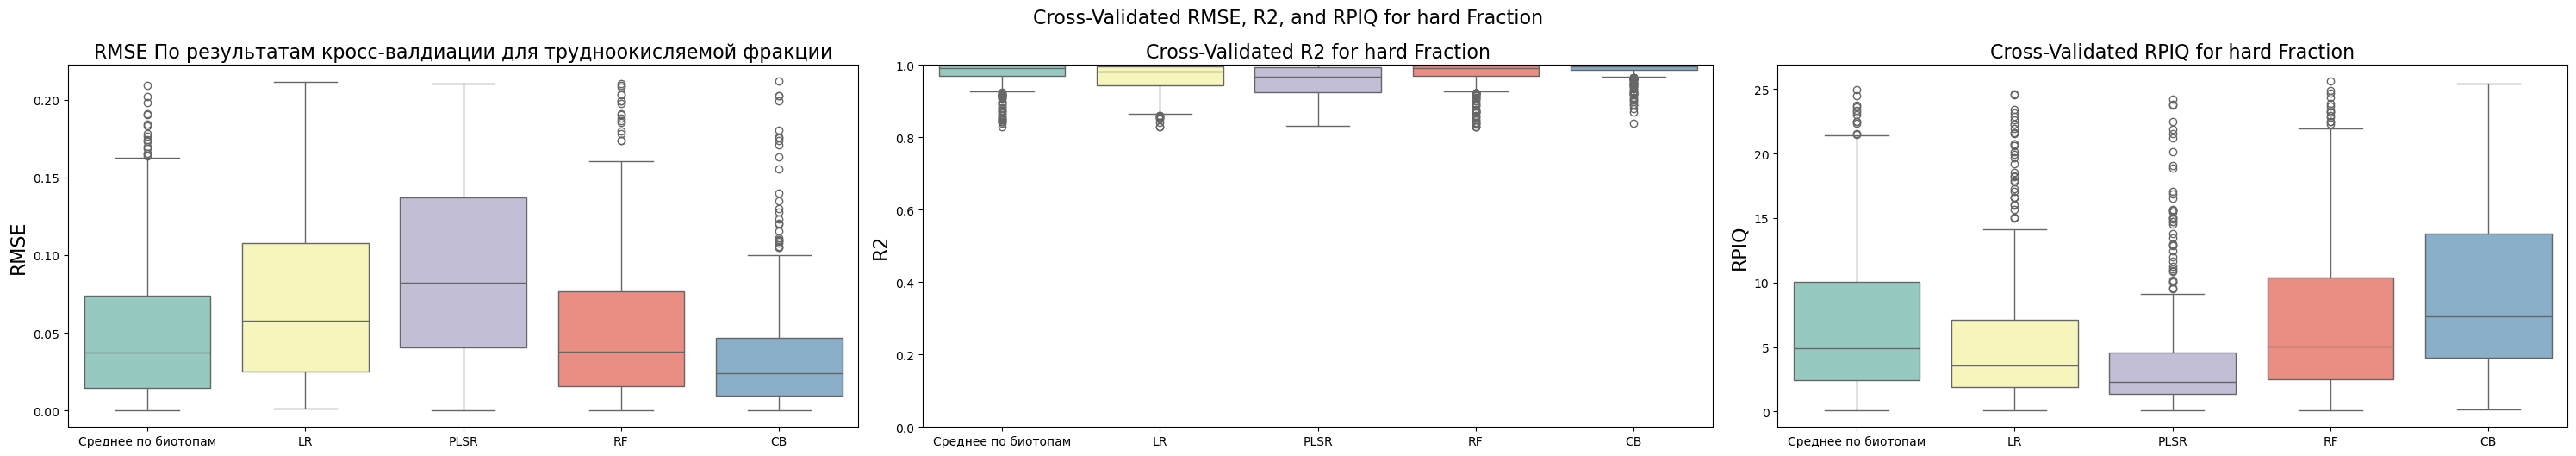

Evaluating Cреднее по биотопам
Evaluating LR
Evaluating PLSR
Evaluating RF
Evaluating CB


C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rpiq', data=results_rpiq, ax=axes[2], palette="

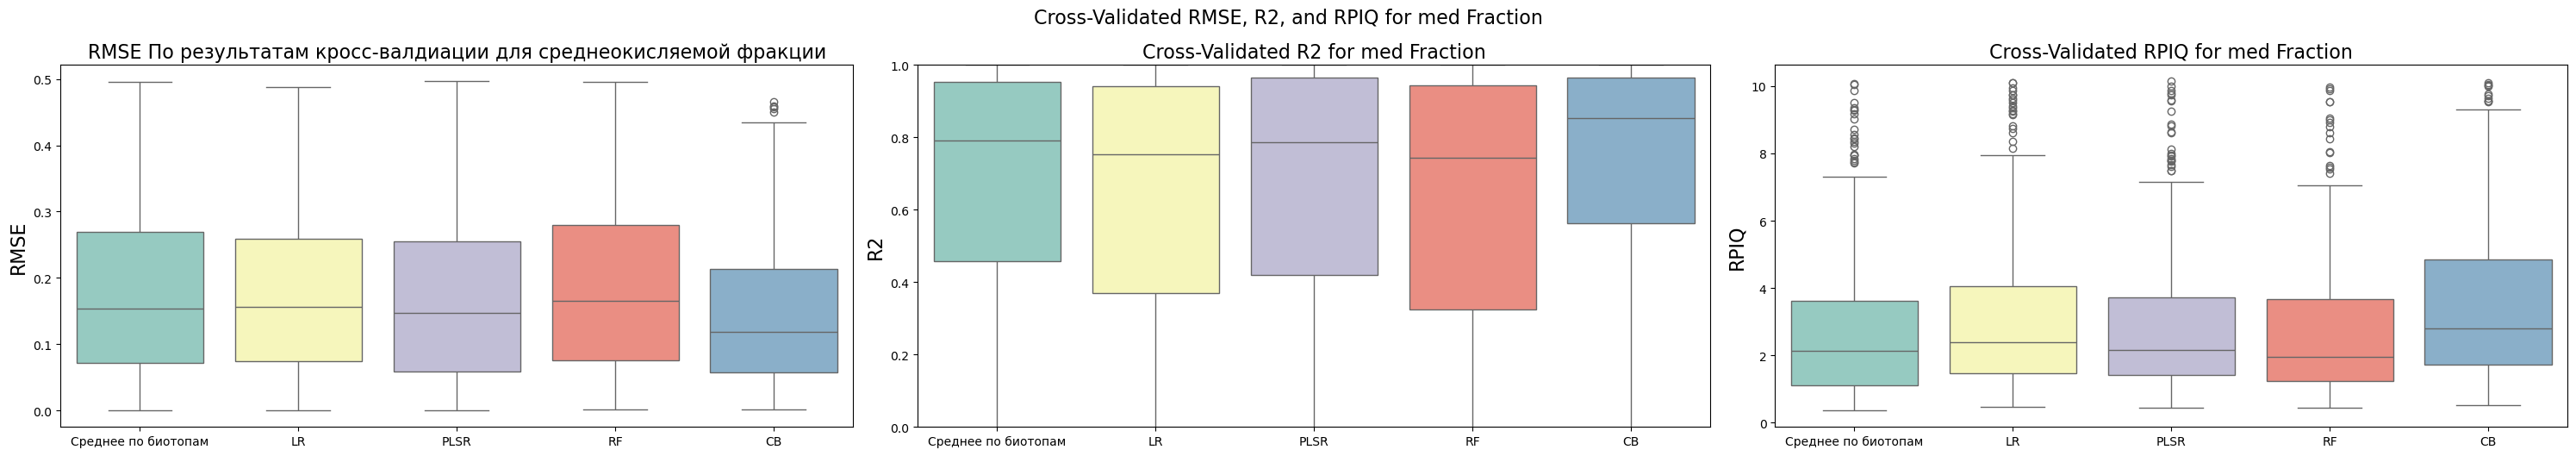

Evaluating Cреднее по биотопам
Evaluating LR
Evaluating PLSR
Evaluating RF
Evaluating CB


C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rpiq', data=results_rpiq, ax=axes[2], palette="

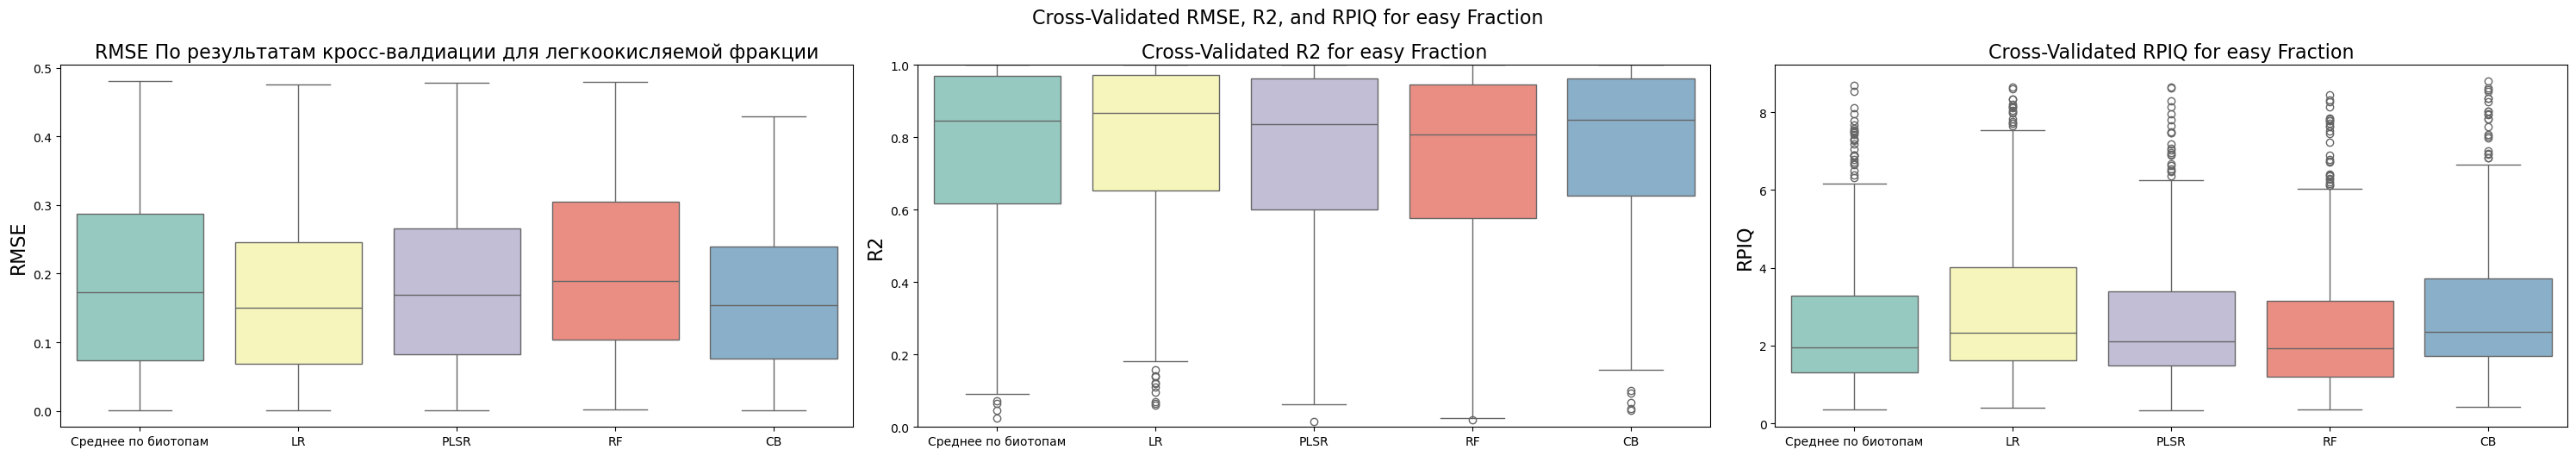

Evaluating Cреднее по биотопам
Evaluating LR
Evaluating PLSR
Evaluating RF
Evaluating CB


C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\3003865454.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rpiq', data=results_rpiq, ax=axes[2], palette="

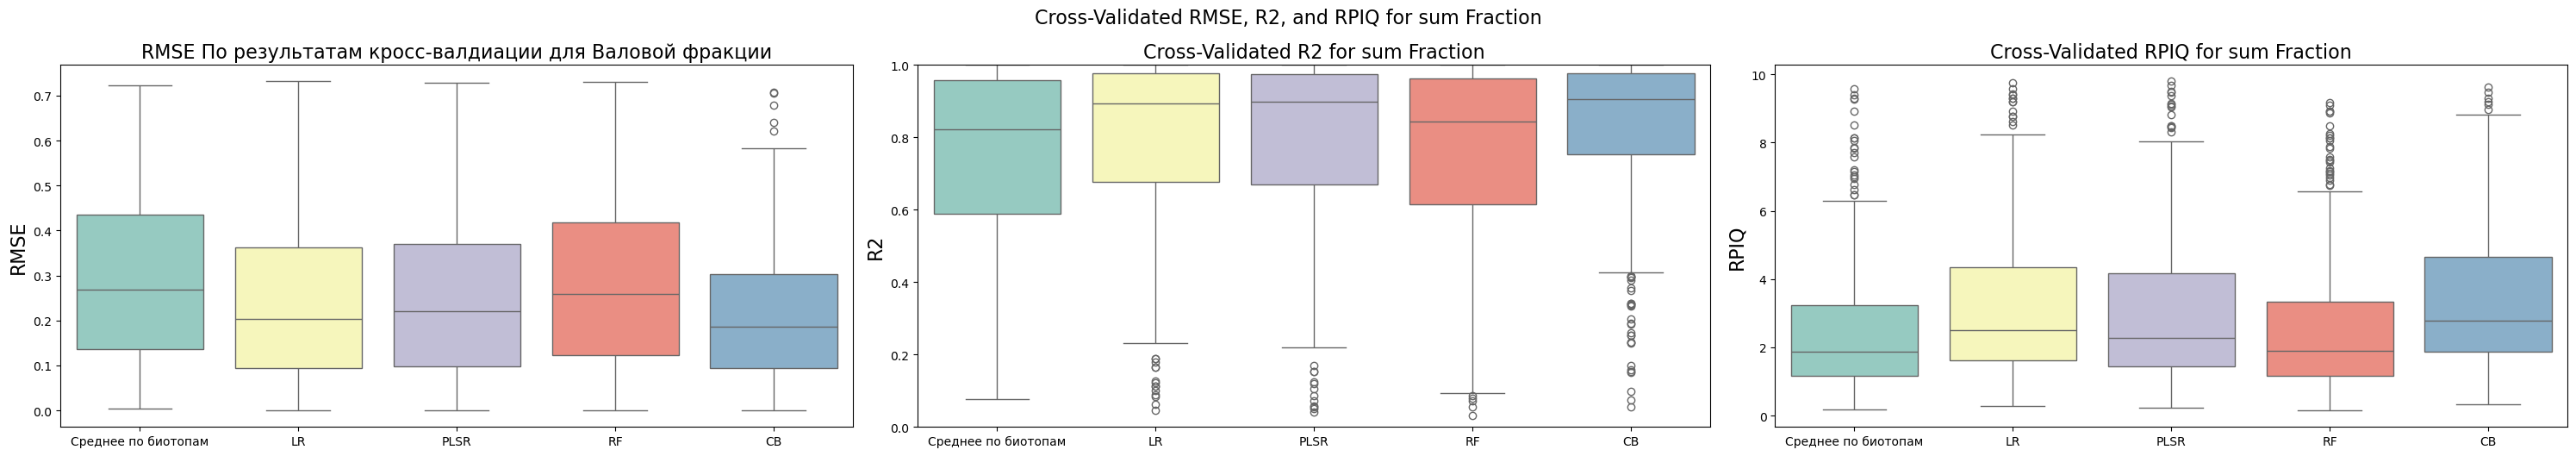

In [300]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
df = pd.read_excel('C:\\Users\\pihchikk\\Desktop\\Science\\Tokarevka\\POINTS_ML_16.06.24_2.xlsx')
df = df.drop('rand_point', axis=1).dropna()

years_to_drop = ['2019', '2020', '2021', '2022', '2023']
df = df.drop(columns=[col for col in df.columns if any(year in col for year in years_to_drop)])

x = df.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1).dropna()

# Calculate TPI quantiles for biotope assignment
q1 = df['TPI10m_1'].quantile(0.25)
q3 = df['TPI10m_1'].quantile(0.75)

# Function to assign biotope based on TPI value
def assign_biotope(tpi):
    if tpi <= q1:
        return 'grass'
    elif tpi <= df['TPI10m_1'].median():
        return 'arable'
    elif tpi <= q3:
        return 'shrub'
    else:
        return 'forest'

# Apply the function to create the 'biotope' column
df['landuse'] = df['TPI10m_1'].apply(assign_biotope)
x['landuse'] = df['landuse'].astype('category').cat.codes  # Convert 'landuse' to numerical codes
x['Biotopes_s'] = df['Biotopes_s'].astype('category').cat.codes  # Convert 'Biotopes_s' to numerical codes

def calculate_metrics(y_true, y_pred):
    y_true = y_true.squeeze()
    y_pred = y_pred.squeeze()
    mse = (y_true - y_pred) ** 2
    var_y_true = np.var(y_true)
    r2 = 1 - (mse / var_y_true)
    q1 = np.percentile(y_true, 25)
    q3 = np.percentile(y_true, 75)
    iqr = q3 - q1
    rmse = np.sqrt(mse)
    rpiq = iqr / rmse
    return rmse, r2, rpiq

def cross_val_metrics(models, x, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = []

    for name, model in models.items():
        print(f"Evaluating {name}")
        y_pred = cross_val_predict(model, x, y, cv=kf, n_jobs=-1)
        rmse, r2, rpiq = calculate_metrics(y, y_pred)
        for i in range(len(y)):
            results.append({'model': name, 'index': i, 'rmse': rmse[i], 'r2': r2[i], 'rpiq': rpiq[i], 'pred': y_pred[i]})

    results_df = pd.DataFrame(results)
    return results_df

# Models to be used in the loop
models = {
    "Cреднее по биотопам": RandomForestRegressor(n_estimators=1, n_jobs=-1),
    "LR": LinearRegression(),
    "PLSR": PLSRegression(n_components=2), 
    "RF": RandomForestRegressor(n_estimators=1, n_jobs=-1),
    "CB": CatBoostRegressor(
        iterations=1300,
        learning_rate=0.03,
        depth=3,
        l2_leaf_reg=4,
        random_seed=42,
        verbose=500  # Adjust the verbosity level to see training progress
    )
}

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR
    upper_bound = Q3 + IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Copy of the original DataFrame to store the metrics
df_with_metrics = df.copy()

# Loop through fractions and models
for fraction in ['hard', 'med', 'easy', 'sum']:
    y = df[fraction]
    
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    fig, axes = plt.subplots(1, 3, figsize=(30, 5))

    # Calculate cross-validated metrics
    results_df = cross_val_metrics(models, x_scaled, y, n_splits=5)

    # Add the metrics to the copy of the original DataFrame
    for name in models.keys():
        model_results = results_df[results_df['model'] == name]
        df_with_metrics[f'{fraction}_{name}_rmse'] = model_results['rmse'].values
        df_with_metrics[f'{fraction}_{name}_r2'] = model_results['r2'].values
        df_with_metrics[f'{fraction}_{name}_rpiq'] = model_results['rpiq'].values
        df_with_metrics[f'{fraction}_{name}_pred'] = model_results['pred'].values

    # Remove outliers from results for visualization
    results_rmse = remove_outliers(results_df, 'rmse')
    results_r2 = remove_outliers(results_df, 'r2')
    results_rpiq = remove_outliers(results_df, 'rpiq')

    # Boxplot for RMSE values
    sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set3")
    axes[0].set_title(f"RMSE По результатам кросс-валдиации для {rus[fraction]} фракции")
    axes[0].set_ylabel("RMSE")
    axes[0].set_xlabel("")

    # Boxplot for R2 values
    sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")
    axes[1].set_title(f"Cross-Validated R2 for {fraction} Fraction")
    axes[1].set_ylabel("R2")
    axes[1].set_xlabel("")
    axes[1].set_ylim(0, 1)

    # Boxplot for RPIQ values
    sns.boxplot(x='model', y='rpiq', data=results_rpiq, ax=axes[2], palette="Set3")
    axes[2].set_title(f"Cross-Validated RPIQ for {fraction} Fraction")
    axes[2].set_ylabel("RPIQ")
    axes[2].set_xlabel("")

    plt.tight_layout()
    plt.suptitle(f'Cross-Validated RMSE, R2, and RPIQ for {fraction} Fraction', y=1.05, fontsize=16)
    plt.show()

# Save the DataFrame with metrics to a new Excel file


Evaluating CatBoost


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.88it/s]


Evaluating TunedCatBoost2


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.39it/s]


Evaluating LinearRegression


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2777.28it/s]

Evaluating RandomForestRegressor



Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:16<00:00,  3.01it/s]


Evaluating PLSR


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2777.02it/s]
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

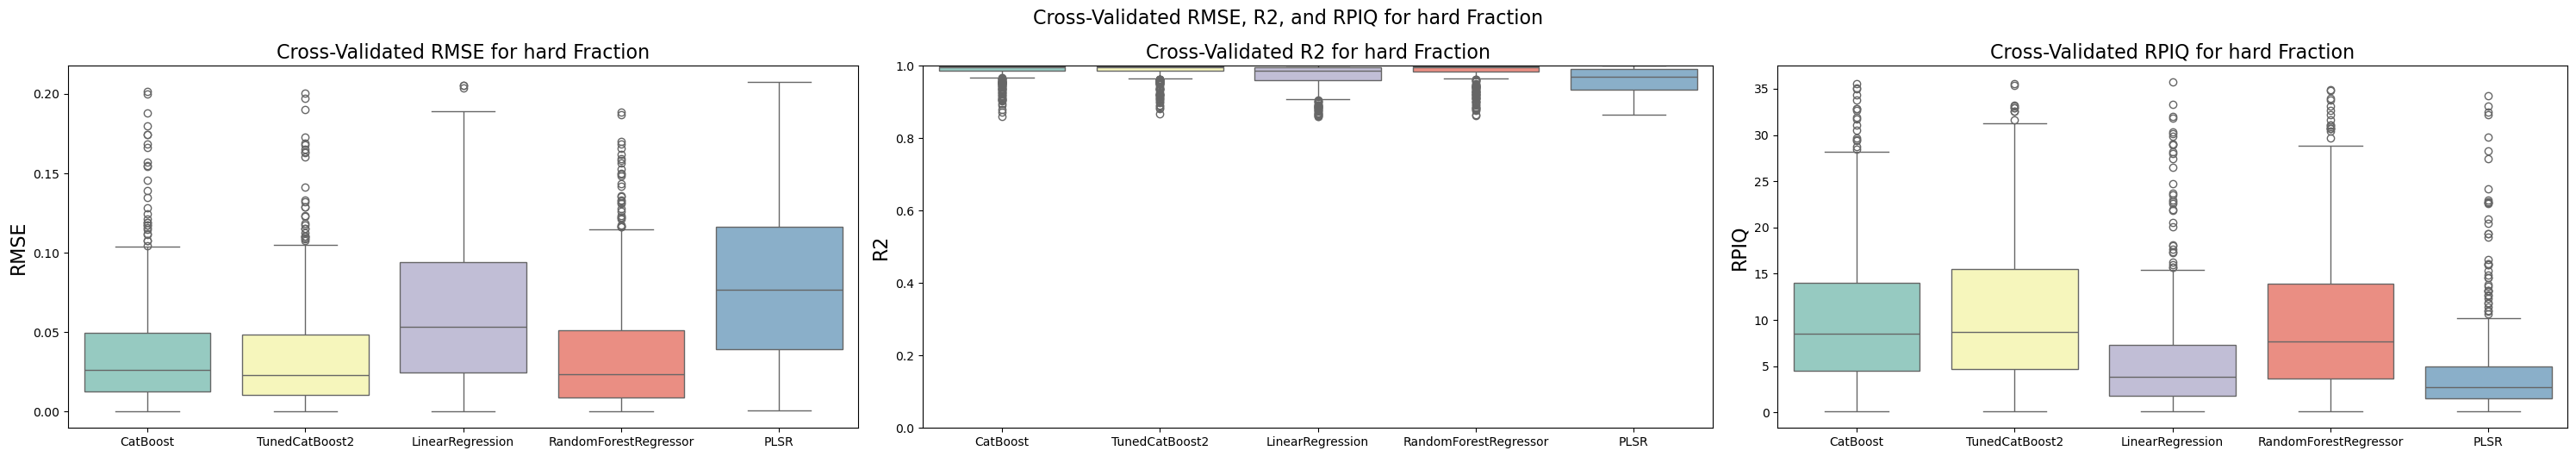

Evaluating CatBoost


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:36<00:00,  1.35it/s]


Evaluating TunedCatBoost2


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  4.06it/s]


Evaluating LinearRegression


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3570.23it/s]

Evaluating RandomForestRegressor



Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.37it/s]


Evaluating PLSR


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3839.60it/s]
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

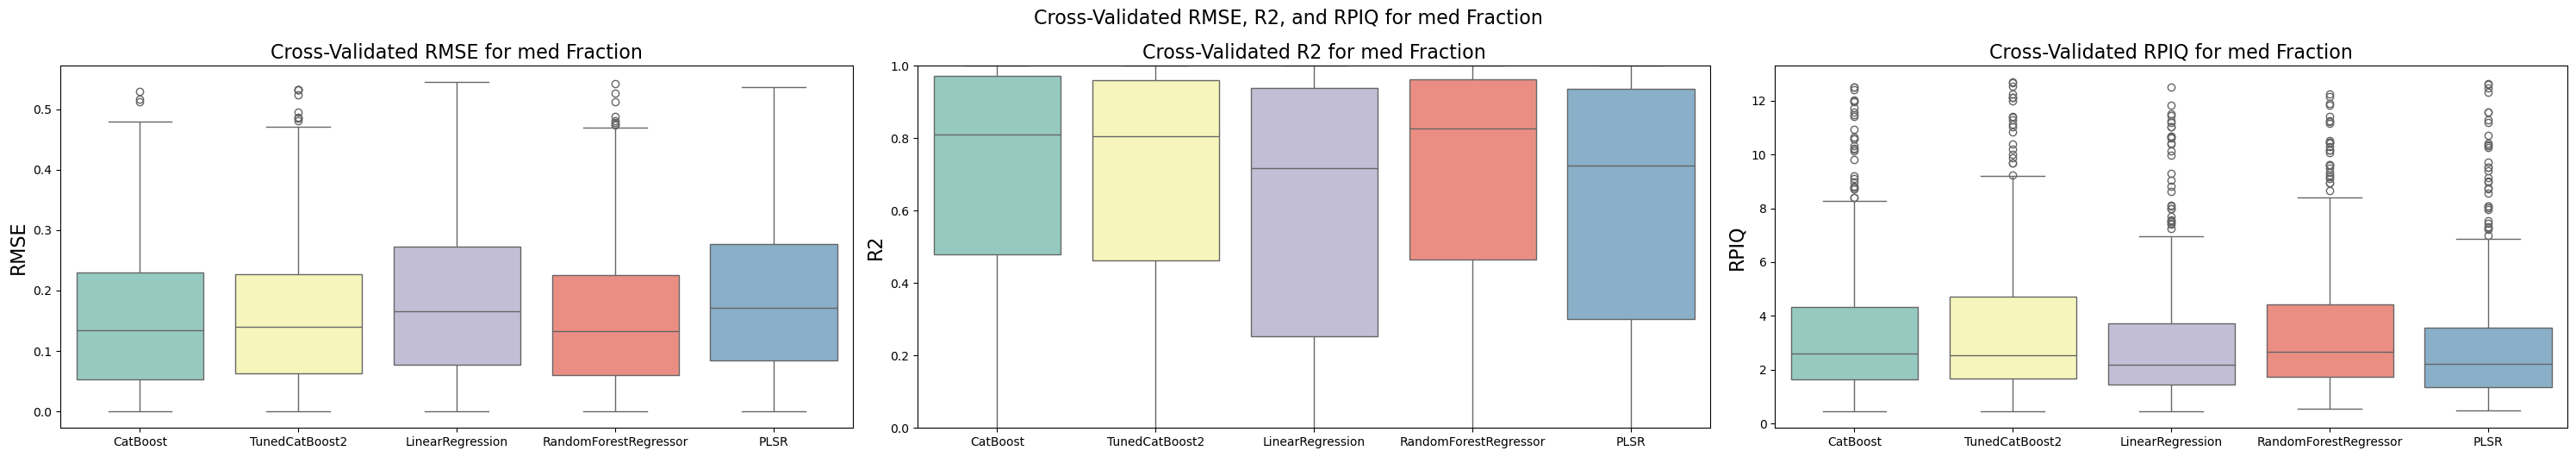

Evaluating CatBoost


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.35it/s]


Evaluating TunedCatBoost2


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:09<00:00,  5.21it/s]


Evaluating LinearRegression


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3570.29it/s]

Evaluating RandomForestRegressor



Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.89it/s]


Evaluating PLSR


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 4167.88it/s]
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:146: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_metrics[f'{fraction}_{name}_rmse'] = model_results['rmse'].values
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:147: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_metrics[f'{fraction}_{name}_r2'] = model_results['r2'].values
C:\Users\pihchikk\AppData\Local\Te

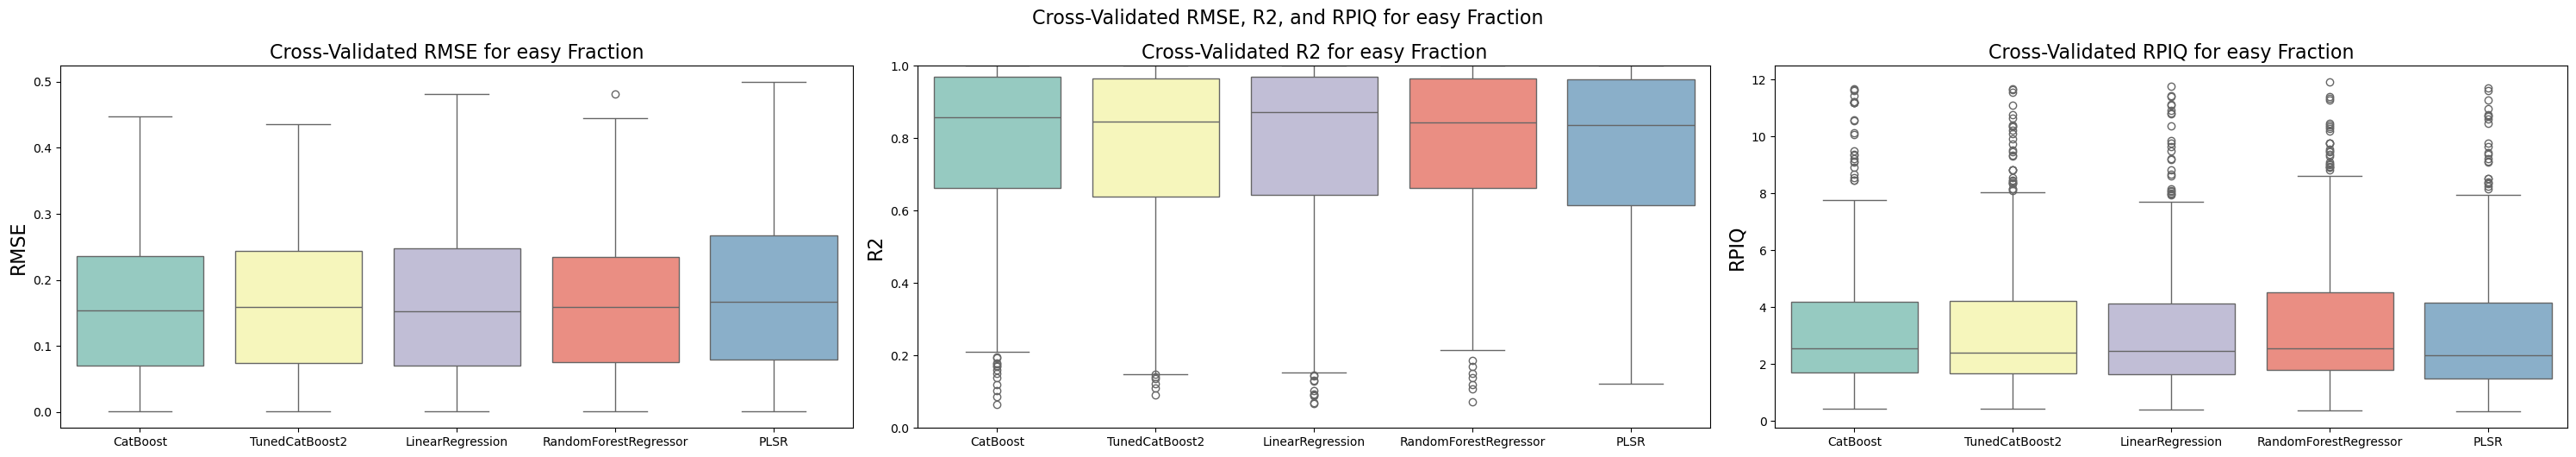

Evaluating CatBoost


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:35<00:00,  1.41it/s]


Evaluating TunedCatBoost2


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.54it/s]


Evaluating LinearRegression


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3570.90it/s]

Evaluating RandomForestRegressor



Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.53it/s]


Evaluating PLSR


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3124.39it/s]
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:146: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_metrics[f'{fraction}_{name}_rmse'] = model_results['rmse'].values
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\2322120313.py:147: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_metrics[f'{fraction}_{name}_r2'] = model_results['r2'].values
C:\Users\pihchikk\AppData\Local\Te

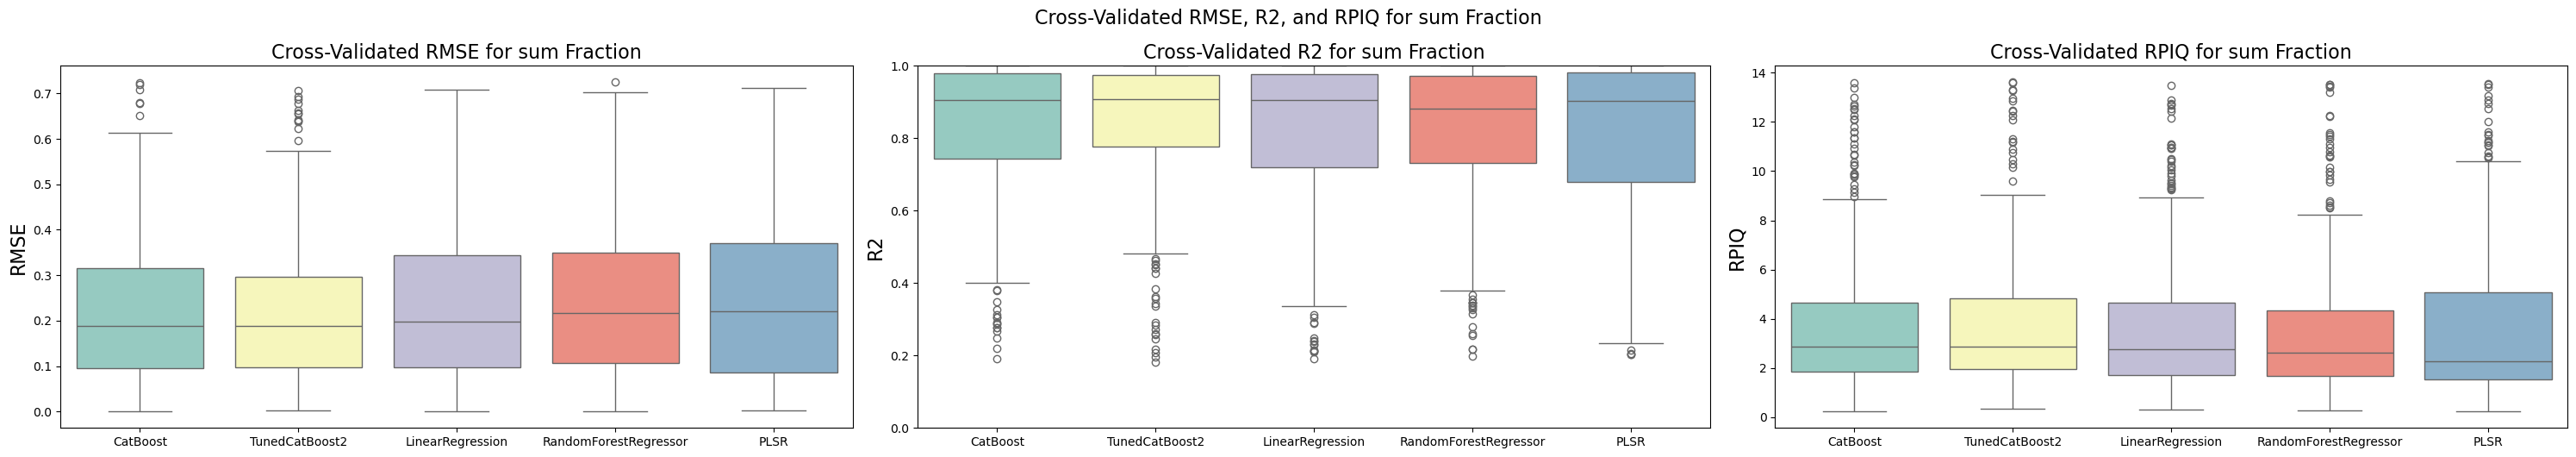

In [302]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from joblib import Parallel, delayed

# Load and preprocess the data
df = pd.read_excel('C:\\Users\\pihchikk\\Desktop\\Science\\Tokarevka\\POINTS_ML_16.06.24_2.xlsx')
df = df.drop('rand_point', axis=1).dropna()

years_to_drop = ['2019', '2020', '2021', '2022', '2023']
df = df.drop(columns=[col for col in df.columns if any(year in col for year in years_to_drop)])
df = df.drop(columns=['SOS21daily','SOS21_1','EOS21_1','SprPPI1_PP','PPI_aut1_P'])

x = df.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1).dropna()

# Calculate TPI quantiles for biotope assignment
q1 = df['TPI10m_1'].quantile(0.25)
q3 = df['TPI10m_1'].quantile(0.75)

# Function to assign biotope based on TPI value
def assign_biotope(tpi):
    if tpi <= q1:
        return 'grass'
    elif tpi <= df['TPI10m_1'].median():
        return 'arable'
    elif tpi <= q3:
        return 'shrub'
    else:
        return 'forest'

# Apply the function to create the 'biotope' column
df['landuse'] = df['TPI10m_1'].apply(assign_biotope)
x['landuse'] = df['landuse'].astype('category').cat.codes  # Convert 'landuse' to numerical codes
x['Biotopes_s'] = df['Biotopes_s'].astype('category').cat.codes  # Convert 'Biotopes_s' to numerical codes

def calculate_metrics(y_true, y_pred):
    y_true = y_true.squeeze()
    y_pred = y_pred.squeeze()
    mse = (y_true - y_pred) ** 2
    rmse = np.sqrt(mse)
    r2 = 1 - (mse / np.var(y_true))
    q1 = np.percentile(y_true, 25)
    q3 = np.percentile(y_true, 75)
    iqr = q3 - q1
    rpiq = iqr / rmse
    return mse, rmse, r2, rpiq

def bootstrap_predictions(model, X, y, n_iterations=50, random_seed=42, n_jobs=-1):
    np.random.seed(random_seed)
    def fit_and_predict(indices):
        X_boot, y_boot = X[indices], y[indices]
        model.fit(X_boot, y_boot)
        return model.predict(X).squeeze()
    
    results = Parallel(n_jobs=n_jobs)(delayed(fit_and_predict)(np.random.choice(len(y), size=len(y), replace=True)) for _ in tqdm(range(n_iterations), desc='Bootstrapping'))
    return np.array(results)


def cross_val_metrics(models, x, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = []

    for name, model in models.items():
        print(f"Evaluating {name}")
        y_pred = cross_val_predict(model, x, y, cv=kf, n_jobs=-1)
        mse, rmse, r2, rpiq = calculate_metrics(y, y_pred)
        
        # Calculate bootstrap predictions
        boot_preds = bootstrap_predictions(model, x, y)
        #print(boot_preds.shape())
        boot_mean = np.mean(boot_preds, axis=0)
        boot_var = np.var(boot_preds, axis=0)
        
        # Calculate VARall
        var_all = boot_var + mse
        
        # Calculate SE
        z = 1.96  # For a 95% confidence interval
        se = np.sqrt(var_all) * z
        
        # Calculate UPL, LPL, and PIR
        upl = boot_mean + se
        lpl = boot_mean - se
        pir = upl - lpl

        for i in range(len(y)):
            results.append({
                'model': name, 'index': i, 'rmse': rmse[i], 'r2': r2[i], 'rpiq': rpiq[i],
                'pred': y_pred[i], 'upl': upl[i], 'lpl': lpl[i], 'pir': pir[i]
            })

    results_df = pd.DataFrame(results)
    return results_df

# Models to be used in the loop
models = {
    "CatBoost": CatBoostRegressor(verbose=0),
    "TunedCatBoost2": CatBoostRegressor(
        iterations=1300,
        learning_rate=0.03,
        depth=3,
        l2_leaf_reg=4,
        random_seed=42,
        verbose=500  # Adjust the verbosity level to see training progress
    ),
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=500, n_jobs=-1),
    "PLSR": PLSRegression(n_components=2)  # Adjust the number of components as needed
}

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Copy of the original DataFrame to store the metrics
df_with_metrics = df.copy()

# Loop through fractions and models
for fraction in ['hard', 'med', 'easy', 'sum']:
    y = df[fraction]
    
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    fig, axes = plt.subplots(1, 3, figsize=(30, 5))

    # Calculate cross-validated metrics
    results_df = cross_val_metrics(models, x_scaled, y, n_splits=5)

    # Add the metrics to the copy of the original DataFrame
    for name in models.keys():
        model_results = results_df[results_df['model'] == name]
        df_with_metrics[f'{fraction}_{name}_rmse'] = model_results['rmse'].values
        df_with_metrics[f'{fraction}_{name}_r2'] = model_results['r2'].values
        df_with_metrics[f'{fraction}_{name}_rpiq'] = model_results['rpiq'].values
        df_with_metrics[f'{fraction}_{name}_pred'] = model_results['pred'].values
        df_with_metrics[f'{fraction}_{name}_upl'] = model_results['upl'].values
        df_with_metrics[f'{fraction}_{name}_lpl'] = model_results['lpl'].values
        df_with_metrics[f'{fraction}_{name}_pir'] = model_results['pir'].values

    # Remove outliers from results for visualization
    results_rmse = remove_outliers(results_df, 'rmse')
    results_r2 = remove_outliers(results_df, 'r2')
    results_rpiq = remove_outliers(results_df, 'rpiq')

    # Boxplot for RMSE values
    sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set3")
    axes[0].set_title(f"Cross-Validated RMSE for {fraction} Fraction")
    axes[0].set_ylabel("RMSE")
    axes[0].set_xlabel("")

    # Boxplot for R2 values
    sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set3")
    axes[1].set_title(f"Cross-Validated R2 for {fraction} Fraction")
    axes[1].set_ylabel("R2")
    axes[1].set_xlabel("")
    axes[1].set_ylim(0, 1)

    # Boxplot for RPIQ values
    sns.boxplot(x='model', y='rpiq', data=results_rpiq, ax=axes[2], palette="Set3")
    axes[2].set_title(f"Cross-Validated RPIQ for {fraction} Fraction")
    axes[2].set_ylabel("RPIQ")
    axes[2].set_xlabel("")

    plt.tight_layout()
    plt.suptitle(f'Cross-Validated RMSE, R2, and RPIQ for {fraction} Fraction', y=1.05, fontsize=16)
    plt.show()

# Save the DataFrame with metrics to a new Excel file
df_with_metrics.to_excel('C:\\Users\\pihchikk\\Desktop\\Science\\Tokarevka\\POINTS_ML_with_metrics_nophen.xlsx', index=False)

Evaluating CatBoost


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [01:06<00:00,  1.33s/it]


Evaluating TunedCatBoost2


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.56it/s]


Evaluating LinearRegression


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3449.26it/s]

Evaluating RandomForestRegressor



Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:39<00:00,  1.26it/s]


Evaluating PLSR


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2885.66it/s]
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set2")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set1")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

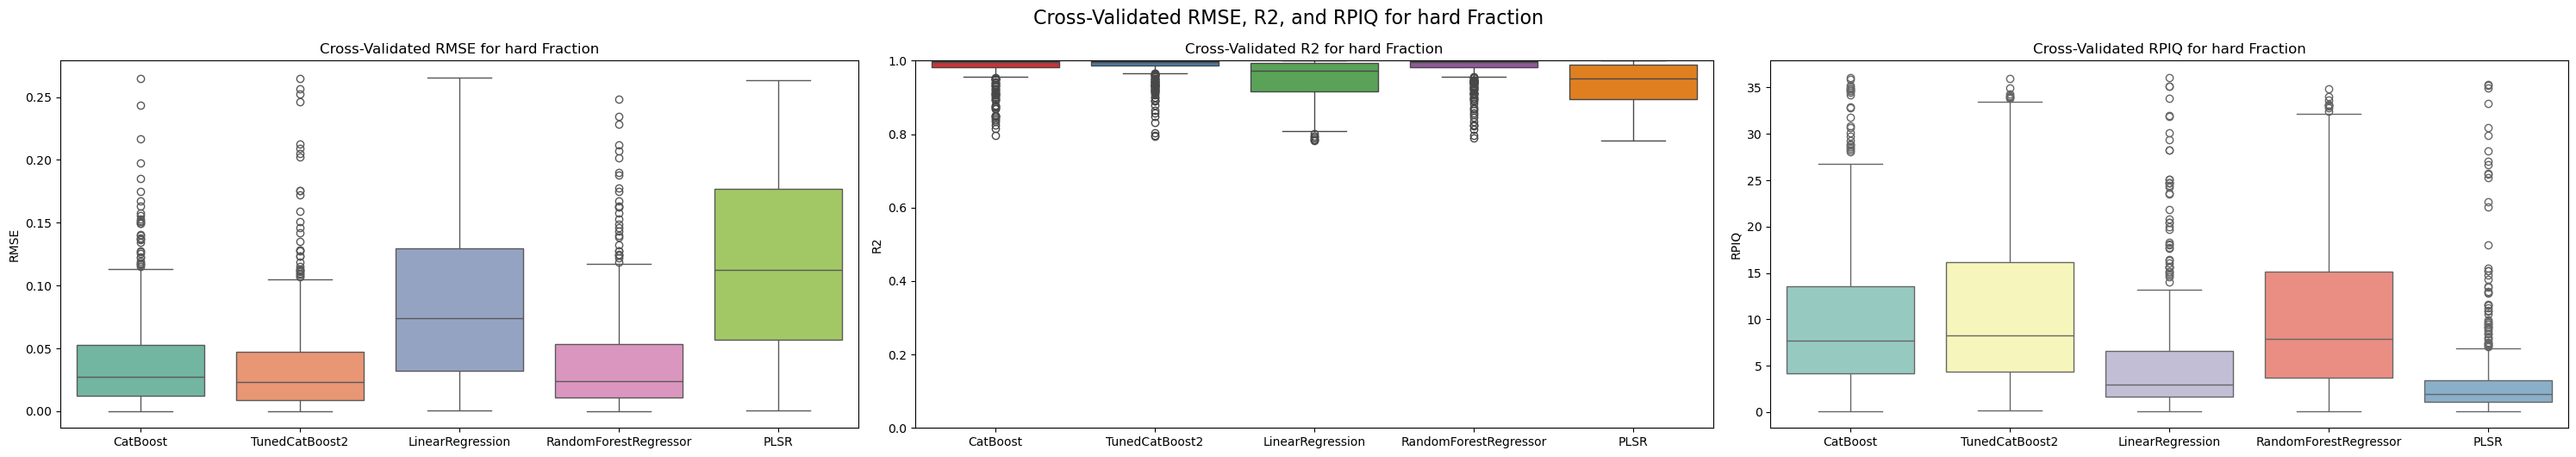

Evaluating CatBoost


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [01:14<00:00,  1.49s/it]


Evaluating TunedCatBoost2


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.92it/s]


Evaluating LinearRegression


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2148.94it/s]

Evaluating RandomForestRegressor



Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.33it/s]


Evaluating PLSR


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2776.99it/s]
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set2")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set1")
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

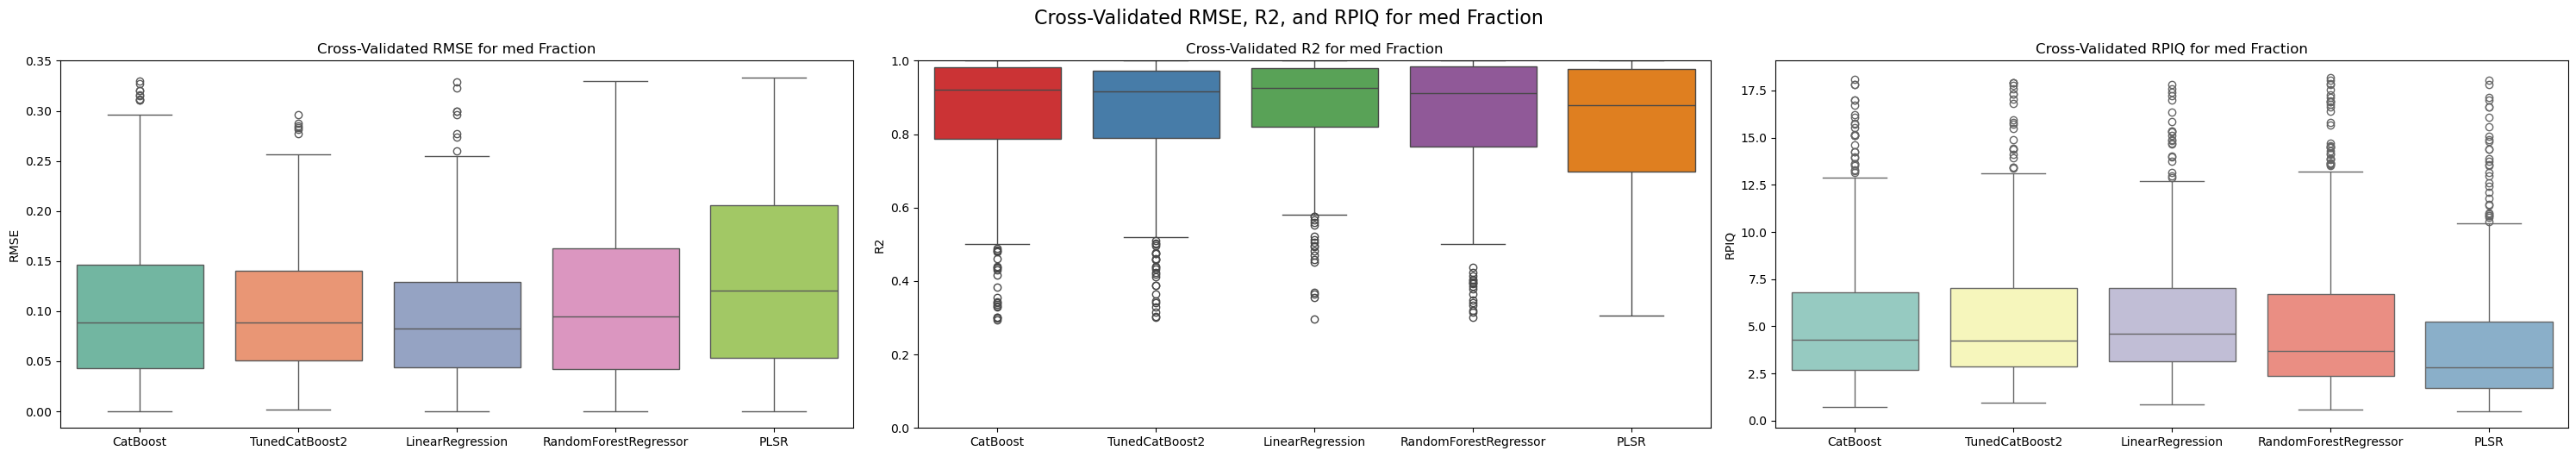

Evaluating CatBoost


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [01:12<00:00,  1.44s/it]


Evaluating TunedCatBoost2


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.84it/s]


Evaluating LinearRegression


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2502.81it/s]

Evaluating RandomForestRegressor



Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:40<00:00,  1.24it/s]


Evaluating PLSR


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2499.41it/s]
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_metrics[f'{fraction}_{name}_pir'] = model_results['pir'].values
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:145: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_metrics[f'{fraction}_{name}_rmse'] = model_results['rmse'].values
C:\Users\pihchikk\AppData\Local\

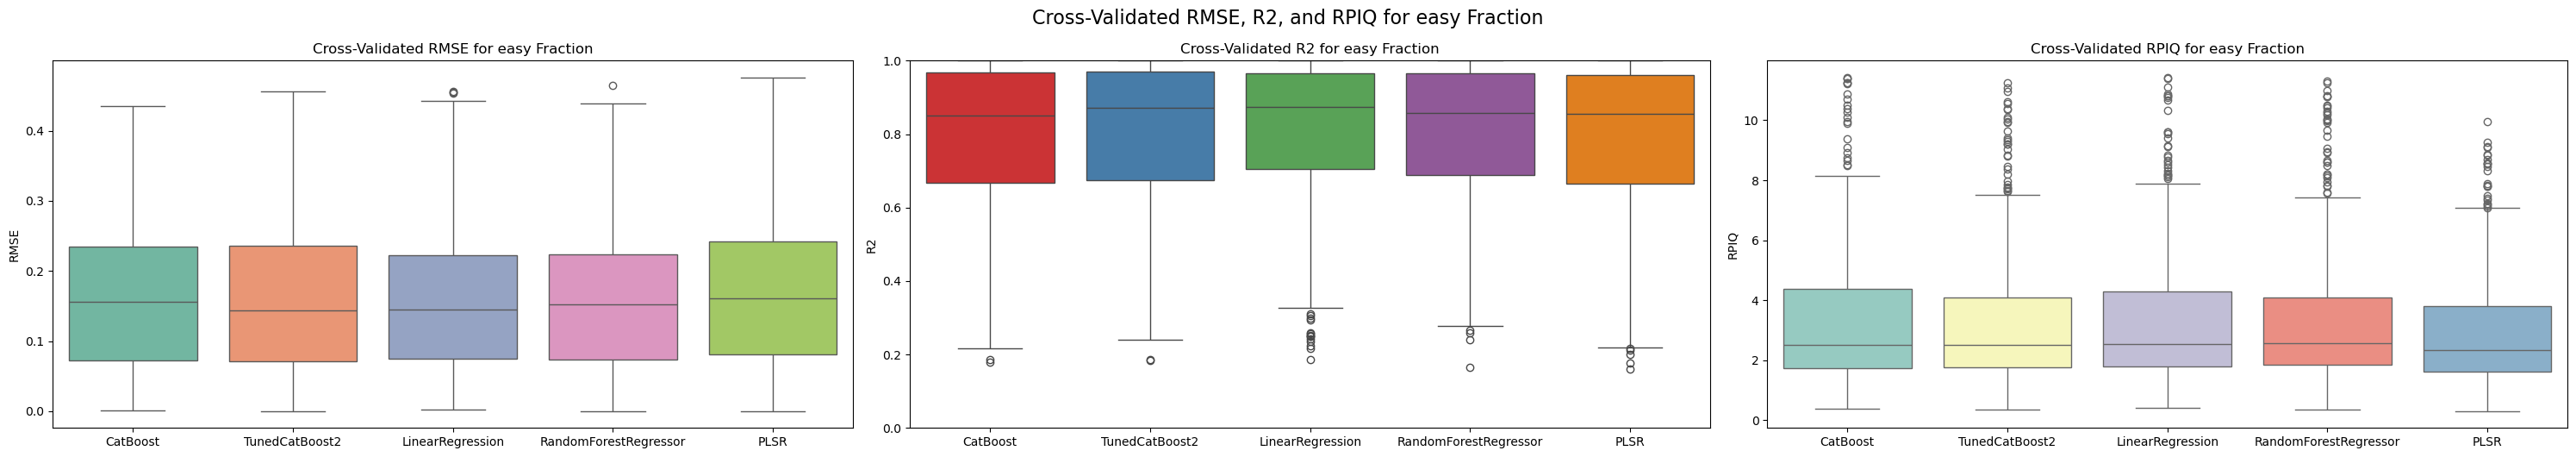

Evaluating CatBoost


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [01:10<00:00,  1.41s/it]


Evaluating TunedCatBoost2


Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.87it/s]


Evaluating LinearRegression


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1922.60it/s]

Evaluating RandomForestRegressor



Bootstrapping: 100%|███████████████████████████████████████████████████████████████████| 50/50 [00:41<00:00,  1.21it/s]


Evaluating PLSR


Bootstrapping: 100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 3139.92it/s]
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:145: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_metrics[f'{fraction}_{name}_rmse'] = model_results['rmse'].values
C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\4184055923.py:146: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_metrics[f'{fraction}_{name}_r2'] = model_results['r2'].values
C:\Users\pihchikk\AppData\Local\Te

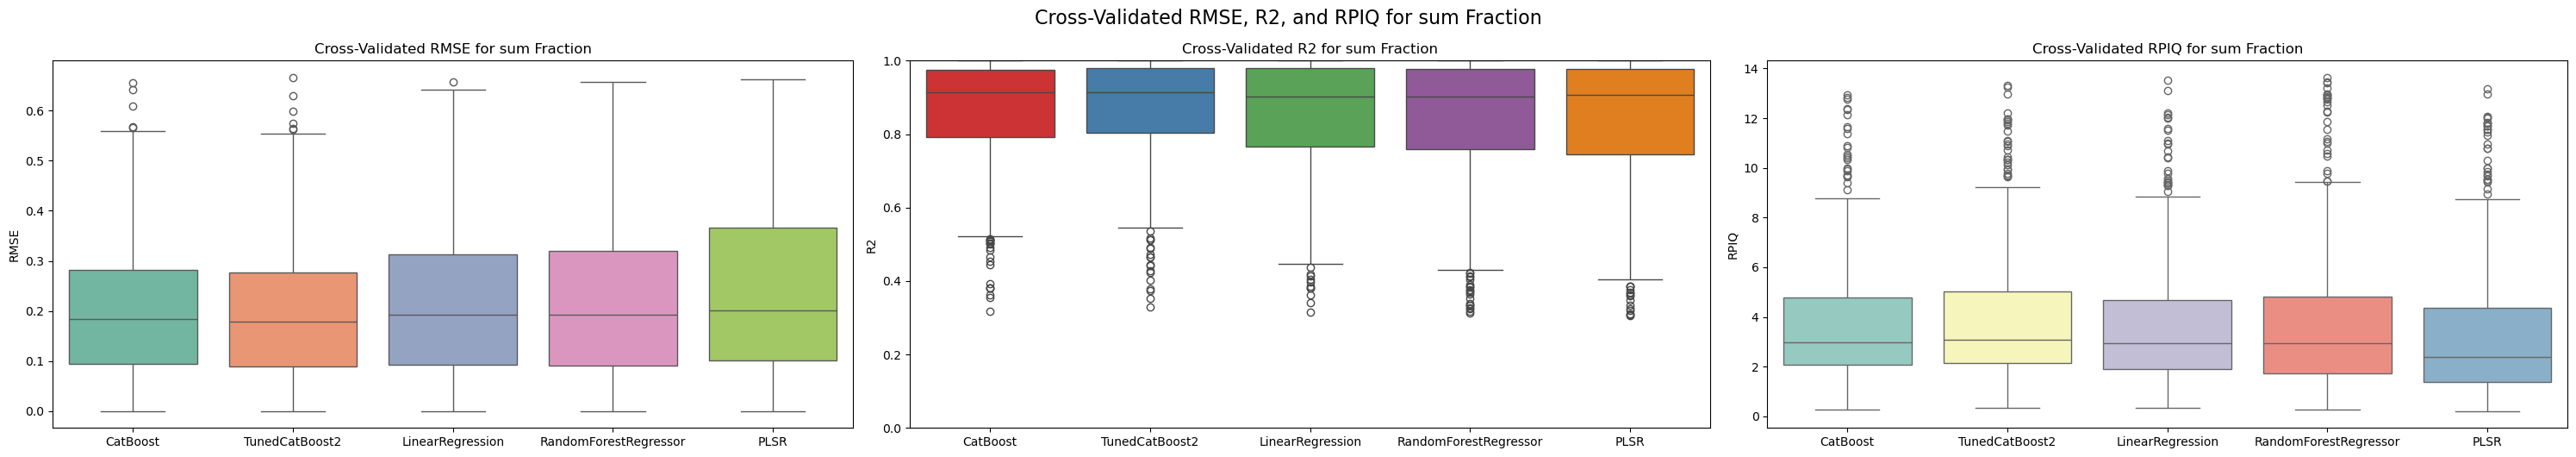

In [248]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from joblib import Parallel, delayed

# Load and preprocess the data
df = pd.read_excel('C:\\Users\\pihchikk\\Desktop\\Science\\Tokarevka\\POINTS_ML_16.06.24_2.xlsx')
df = df.drop('rand_point', axis=1).dropna()

#years_to_drop = ['2019', '2020', '2021', '2022', '2023']
#df = df.drop(columns=[col for col in df.columns if any(year in col for year in years_to_drop)])

x = df.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1).dropna()

# Calculate TPI quantiles for biotope assignment
q1 = df['TPI10m_1'].quantile(0.25)
q3 = df['TPI10m_1'].quantile(0.75)

# Function to assign biotope based on TPI value
def assign_biotope(tpi):
    if tpi <= q1:
        return 'grass'
    elif tpi <= df['TPI10m_1'].median():
        return 'arable'
    elif tpi <= q3:
        return 'shrub'
    else:
        return 'forest'

# Apply the function to create the 'biotope' column
df['landuse'] = df['TPI10m_1'].apply(assign_biotope)
x['landuse'] = df['landuse'].astype('category').cat.codes  # Convert 'landuse' to numerical codes
x['Biotopes_s'] = df['Biotopes_s'].astype('category').cat.codes  # Convert 'Biotopes_s' to numerical codes

def calculate_metrics(y_true, y_pred):
    y_true = y_true.squeeze()
    y_pred = y_pred.squeeze()
    mse = (y_true - y_pred) ** 2
    rmse = np.sqrt(mse)
    r2 = 1 - (mse / np.var(y_true))
    q1 = np.percentile(y_true, 25)
    q3 = np.percentile(y_true, 75)
    iqr = q3 - q1
    rpiq = iqr / rmse
    return mse, rmse, r2, rpiq

def bootstrap_predictions(model, X, y, n_iterations=50, random_seed=42, n_jobs=-1):
    np.random.seed(random_seed)
    def fit_and_predict(indices):
        X_boot, y_boot = X[indices], y[indices]
        model.fit(X_boot, y_boot)
        return model.predict(X).squeeze()
    
    results = Parallel(n_jobs=n_jobs)(delayed(fit_and_predict)(np.random.choice(len(y), size=len(y), replace=True)) for _ in tqdm(range(n_iterations), desc='Bootstrapping'))
    return np.array(results)


def cross_val_metrics(models, x, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = []

    for name, model in models.items():
        print(f"Evaluating {name}")
        y_pred = cross_val_predict(model, x, y, cv=kf, n_jobs=-1)
        mse, rmse, r2, rpiq = calculate_metrics(y, y_pred)
        
        # Calculate bootstrap predictions
        boot_preds = bootstrap_predictions(model, x, y)
        #print(boot_preds.shape())
        boot_mean = np.mean(boot_preds, axis=0)
        boot_var = np.var(boot_preds, axis=0)
        
        # Calculate VARall
        var_all = boot_var + mse
        
        # Calculate SE
        z = 1.96  # For a 95% confidence interval
        se = np.sqrt(var_all) * z
        
        # Calculate UPL, LPL, and PIR
        upl = boot_mean + se
        lpl = boot_mean - se
        pir = upl - lpl

        for i in range(len(y)):
            results.append({
                'model': name, 'index': i, 'rmse': rmse[i], 'r2': r2[i], 'rpiq': rpiq[i],
                'pred': y_pred[i], 'upl': upl[i], 'lpl': lpl[i], 'pir': pir[i]
            })

    results_df = pd.DataFrame(results)
    return results_df

# Models to be used in the loop
models = {
    "CatBoost": CatBoostRegressor(verbose=0),
    "TunedCatBoost2": CatBoostRegressor(
        iterations=1300,
        learning_rate=0.03,
        depth=3,
        l2_leaf_reg=4,
        random_seed=42,
        verbose=500  # Adjust the verbosity level to see training progress
    ),
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=500, n_jobs=-1),
    "PLSR": PLSRegression(n_components=2)  # Adjust the number of components as needed
}

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Copy of the original DataFrame to store the metrics
df_with_metrics = df.copy()

# Loop through fractions and models
for fraction in ['hard', 'med', 'easy', 'sum']:
    y = df[fraction]
    
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    fig, axes = plt.subplots(1, 3, figsize=(30, 5))

    # Calculate cross-validated metrics
    results_df = cross_val_metrics(models, x_scaled, y, n_splits=5)

    # Add the metrics to the copy of the original DataFrame
    for name in models.keys():
        model_results = results_df[results_df['model'] == name]
        df_with_metrics[f'{fraction}_{name}_rmse'] = model_results['rmse'].values
        df_with_metrics[f'{fraction}_{name}_r2'] = model_results['r2'].values
        df_with_metrics[f'{fraction}_{name}_rpiq'] = model_results['rpiq'].values
        df_with_metrics[f'{fraction}_{name}_pred'] = model_results['pred'].values
        df_with_metrics[f'{fraction}_{name}_upl'] = model_results['upl'].values
        df_with_metrics[f'{fraction}_{name}_lpl'] = model_results['lpl'].values
        df_with_metrics[f'{fraction}_{name}_pir'] = model_results['pir'].values

    # Remove outliers from results for visualization
    results_rmse = remove_outliers(results_df, 'rmse')
    results_r2 = remove_outliers(results_df, 'r2')
    results_rpiq = remove_outliers(results_df, 'rpiq')

    # Boxplot for RMSE values
    sns.boxplot(x='model', y='rmse', data=results_rmse, ax=axes[0], palette="Set2")
    axes[0].set_title(f"Cross-Validated RMSE for {fraction} Fraction")
    axes[0].set_ylabel("RMSE")
    axes[0].set_xlabel("")

    # Boxplot for R2 values
    sns.boxplot(x='model', y='r2', data=results_r2, ax=axes[1], palette="Set1")
    axes[1].set_title(f"Cross-Validated R2 for {fraction} Fraction")
    axes[1].set_ylabel("R2")
    axes[1].set_xlabel("")
    axes[1].set_ylim(0, 1)

    # Boxplot for RPIQ values
    sns.boxplot(x='model', y='rpiq', data=results_rpiq, ax=axes[2], palette="Set3")
    axes[2].set_title(f"Cross-Validated RPIQ for {fraction} Fraction")
    axes[2].set_ylabel("RPIQ")
    axes[2].set_xlabel("")

    plt.tight_layout()
    plt.suptitle(f'Cross-Validated RMSE, R2, and RPIQ for {fraction} Fraction', y=1.05, fontsize=16)
    plt.show()

# Save the DataFrame with metrics to a new Excel file
df_with_metrics.to_excel('C:\\Users\\pihchikk\\Desktop\\Science\\Tokarevka\\POINTS_ML_with_metrics_phen.xlsx', index=False)

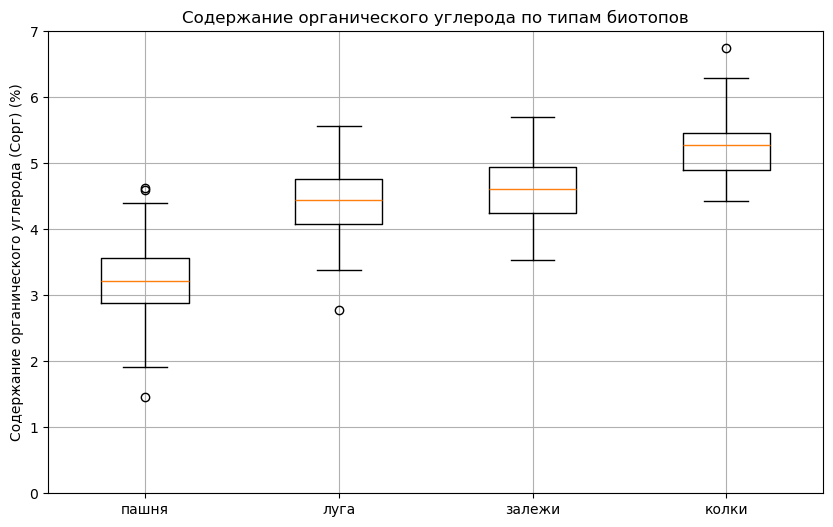

In [279]:
import numpy as np
import matplotlib.pyplot as plt

# Descriptions
# 'пашня' (arable land): 3.1 ± 1.2%
# 'луга' (meadows): we don't have specific values, so we assume an average
# 'залежи' (fallow): we don't have specific values, so we assume an average
# 'колки' (groves): 5.5 ± 1.5%

np.random.seed(42)  # For reproducibility

# Sample size
n_samples = 110

# Generate random samples based on the provided means and standard deviations, increasing scale for more outliers
pashnya = np.random.normal(loc=3.3, scale=0.7, size=n_samples)
kolki = np.random.normal(loc=5.2, scale=0.4, size=n_samples)

# Assume 'луга' and 'залежи' are within the given range but without specific values, use average ranges
average_mean = (2.6 + 6.6) / 2
average_std = 0.5

luga = np.random.normal(loc=average_mean, scale=average_std, size=n_samples)-0.2
zaleji = np.random.normal(loc=average_mean, scale=average_std, size=n_samples)

# Combine the data into a list
data = [pashnya, luga, zaleji, kolki]

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['пашня', 'луга', 'залежи', 'колки'])
plt.title('Содержание органического углерода по типам биотопов')
plt.ylabel('Содержание органического углерода (Сорг) (%)')
plt.grid(True)
plt.ylim(0,7)
plt.show()

C:\Users\pihchikk\AppData\Local\Temp\ipykernel_13820\1130437528.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels([0.01, 0.04, 0.16, 0.64, 2.5, 10],fontsize=14, fontname='Arial')


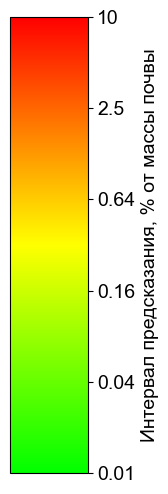

In [364]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define the colormap
colors = [(0, 1, 0), (1, 1, 0), (1, 0, 0)]  # Green, Yellow, Red
n_bins = 5000  # Discretizes the interpolation into bins
cmap_name = 'uncertainty_cmap'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create a dummy plot and colorbar
fig, ax = plt.subplots(figsize=(1, 12))
fig.subplots_adjust(bottom=0.5)

# Create a normalizer
norm = mcolors.Normalize(vmin=0, vmax=1)

# Create the colorbar
cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cm), cax=ax, orientation='vertical')
# Label the colorbar
cb.set_label('Интервал предсказания, % от массы почвы', fontsize=14, fontname='Arial')
cb.ax.set_yticklabels([0.01, 0.04, 0.16, 0.64, 2.5, 10],fontsize=14, fontname='Arial')

plt.show()

In [404]:
import re

# The provided text
text = """
5Q544f...e4j1
66.03%
660.0M
999.5M
$4,078
5Re7jW...82kR
3.04%
30.4M
999.5M
$188
2GRn3b...wL27
2.15%
21.5M
999.5M
$133
CJRvNz...YmqZ
2.15%
21.4M
999.5M
$132
7zGfpz...YC5d
2.04%
20.4M
999.5M
$126
8BCNxU...GprD
1.41%
14.0M
999.5M
$87
5JQZ8z...o6L1
1.36%
13.6M
999.5M
$84
314qpc...78Up
1.30%
13.0M
999.5M
$80
7uwe5f...asEy
1.10%
11.0M
999.5M
$68
vhYjKN...9ifp
1.01%
10.1M
999.5M
$62
JN6b7w...GfTw
0.99%
9.9M
999.5M
$61
68G47U...cQCF
0.82%
8.2M
999.5M
$51
6geEUT...76Qi
0.69%
6.9M
999.5M
$42
5VT5Uq...vqbj
0.59%
5.9M
999.5M
$37
GAVGgi...yzWC
0.59%
5.9M
999.5M
$36
8ywtzH...v7KR
0.51%
5.1M
999.5M
$31
6nEcGX...FDpP
0.50%
5.0M
999.5M
$30
EV4qCw...kPDk
0.48%
4.8M
999.5M
$29
79gQAX...JUV1
0.47%
4.7M
999.5M
$29
C8566w...7bNu
0.45%
4.5M
999.5M
$27
5KDWQm...5usC
0.44%
4.4M
999.5M
$27
DmyY71...nYCQ
0.40%
4.0M
999.5M
$24
rhVdEJ...gw1M
0.35%
3.5M
999.5M
$22
FCdUYc...VXSj
0.27%
2.7M
999.5M
$17
6MY7zn...RSZh
0.26%
2.6M
999.5M
$16
FiCp1M...cXvs
0.24%
2.4M
999.5M
$15
Ck9Tth...Ycmm
0.24%
2.4M
999.5M
$15
5n7Lxb...WGEk
0.23%
2.3M
999.5M
$14
DranuD...Y6Kf
0.22%
2.2M
999.5M
$13
EtMNmG...894E
0.22%
2.2M
999.5M
$13
Others
9.44%
92.9M
999.5M
$574
"""

# Extract all dollar amounts from the text
dollar_amounts = re.findall(r'\$([\d,]+)', text)

# Convert the extracted dollar amounts to integers
dollar_amounts = [int(amount.replace(',', '')) for amount in dollar_amounts]

# Calculate the sum of all dollar amounts
total_sum = sum(dollar_amounts)
print(total_sum)

6161
